
╔══════════════════════════════════════════════════════════╗
║      ML TRADING - V8.8 PROFIT MAXIMIZER (VISUAL PACK)    ║
╚══════════════════════════════════════════════════════════╝
🎯 KEY IMPROVEMENTS:
✅ Lower entry threshold - More opportunities
✅ Higher take profit - Capture bigger moves
✅ Trailing stop - Let profits run
✅ Enhanced features - Better ML predictions
✅ Aggressive sizing - Maximize profitable trades


📅 Running backtest until 2025-12-29
📈 Adjusted BTC entry threshold to 0.40 (from 0.38)

🚀 ML TRADING SYSTEM - PHASE 4 V8.8 (PROFIT MAXIMIZER + VISUAL PACK)

📊 Processing BTC-USD
------------------------------------------------------------
 📈 Total raw data: 2189 days
 🔄 WFV 1/5: Train=1194, Test=199 (2023-10-25 to 2024-05-10)


2025-12-29 13:02:42,451 | INFO | BTC-USD | ML validate precision_on_signals=0.192 | signals=26
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.192 | signals=26


 🔄 WFV 2/5: Train=1393, Test=199 (2024-05-11 to 2024-11-25)


2025-12-29 13:02:47,825 | INFO | BTC-USD | ML validate precision_on_signals=0.133 | signals=15
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.133 | signals=15


 🔄 WFV 3/5: Train=1592, Test=199 (2024-11-26 to 2025-06-12)


2025-12-29 13:02:51,858 | INFO | BTC-USD | ML validate precision_on_signals=0.125 | signals=8
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.125 | signals=8


 🔄 WFV 4/5: Train=1791, Test=199 (2025-06-13 to 2025-12-28)


2025-12-29 13:02:54,225 | INFO | BTC-USD | ML validate precision_on_signals=0.500 | signals=6
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.500 | signals=6


 📊 BTC-USD:
   Return: +71.26% vs B&H: +154.58% (-83.31%)
   Sharpe: 0.89 | Sortino: 1.02
   Win Rate: 20.6% | Profit Factor: 1.28
   Max DD: -22.38% | Exposure: 39.7%
   Avg Position: 92.2%


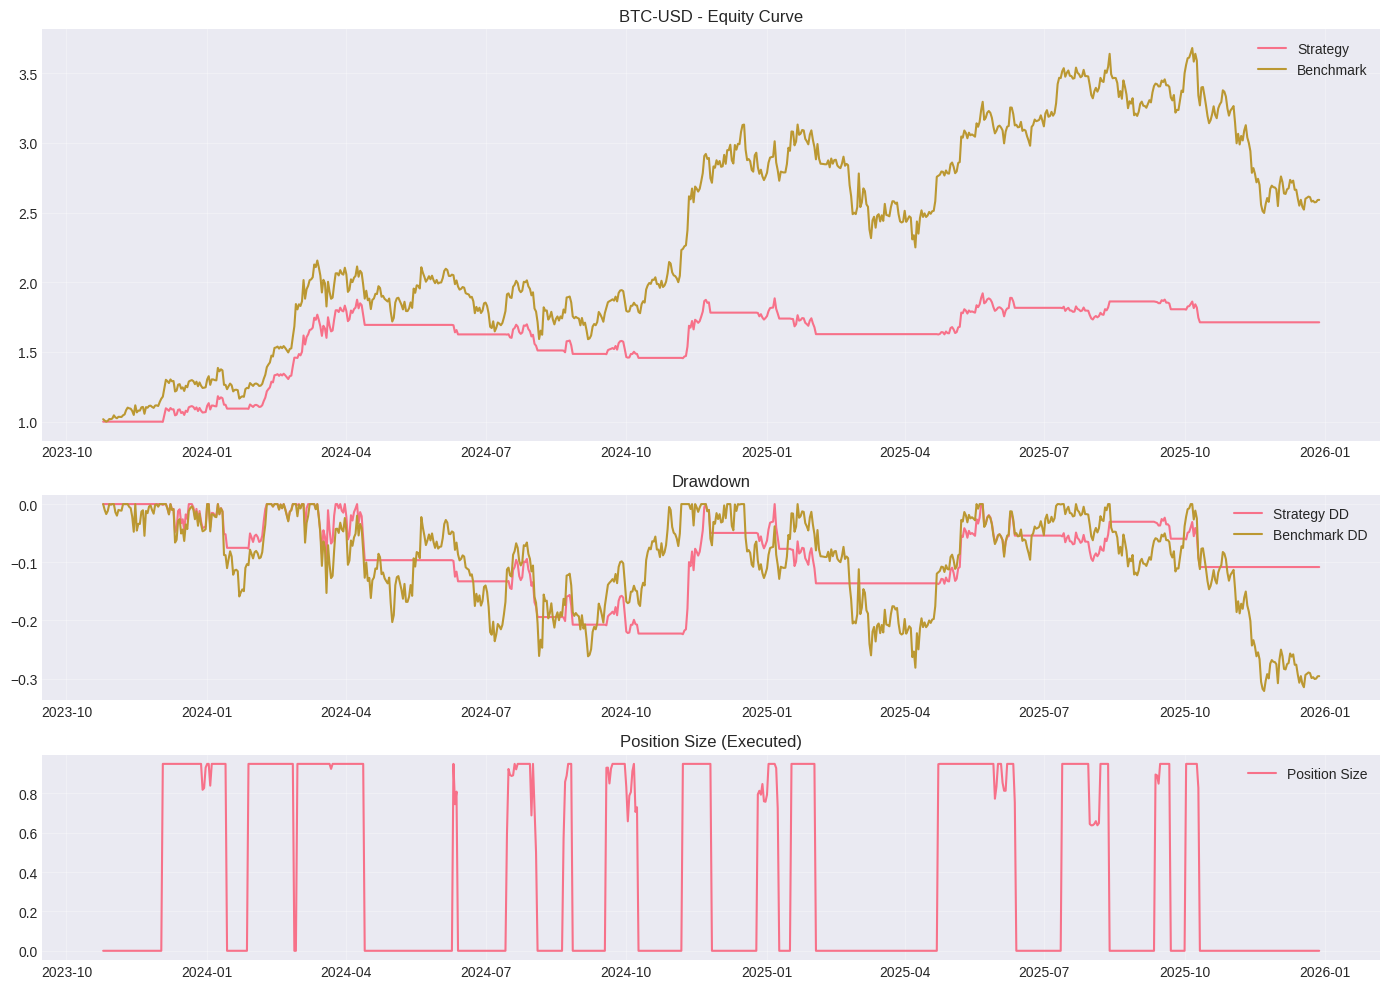

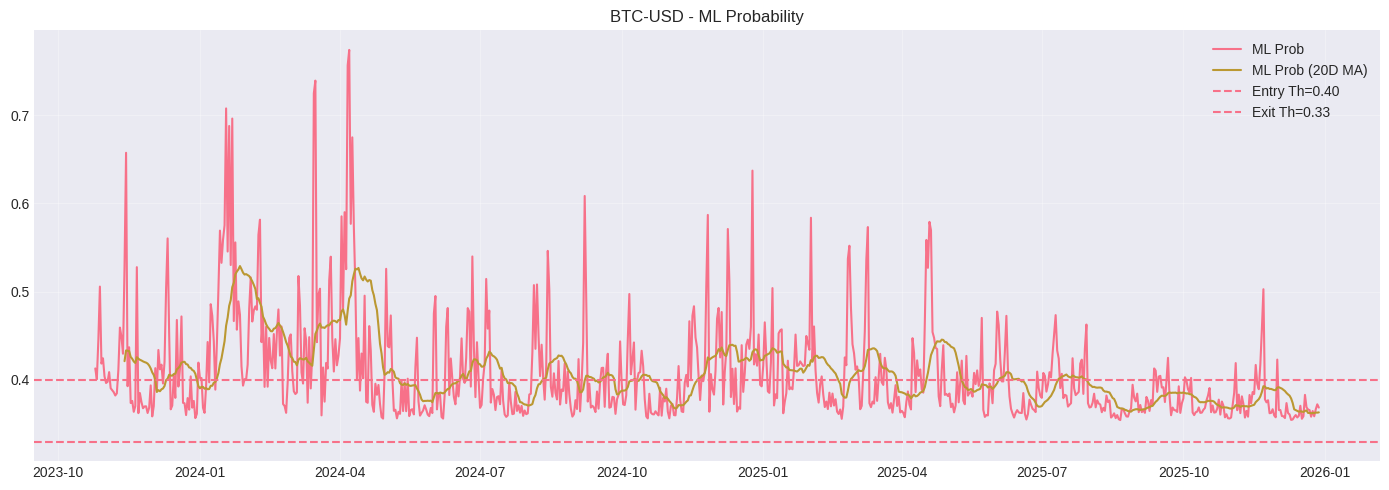

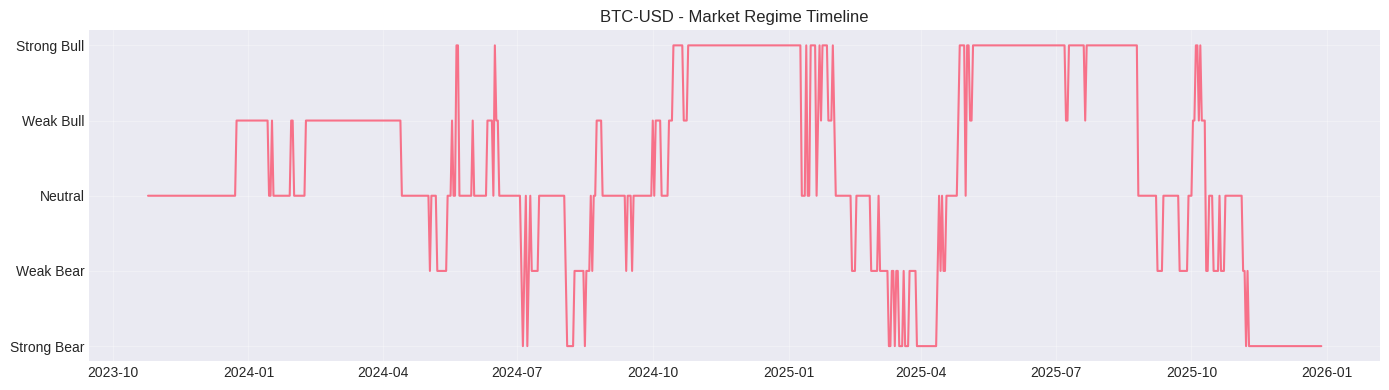

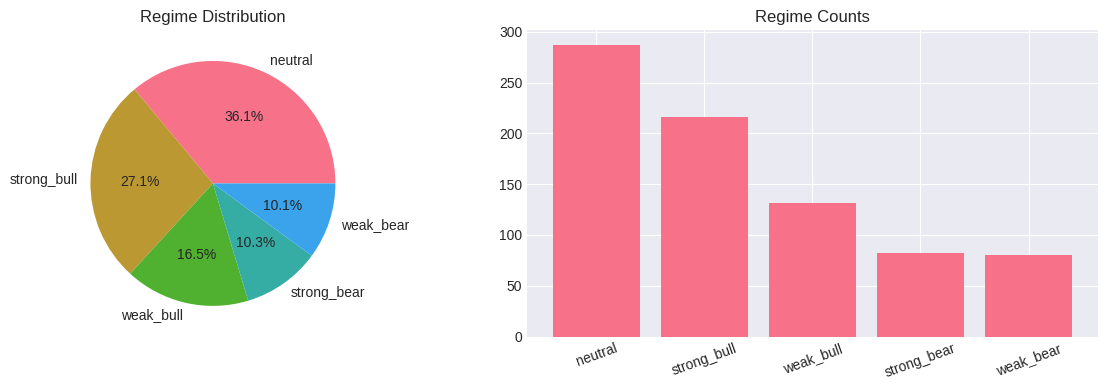

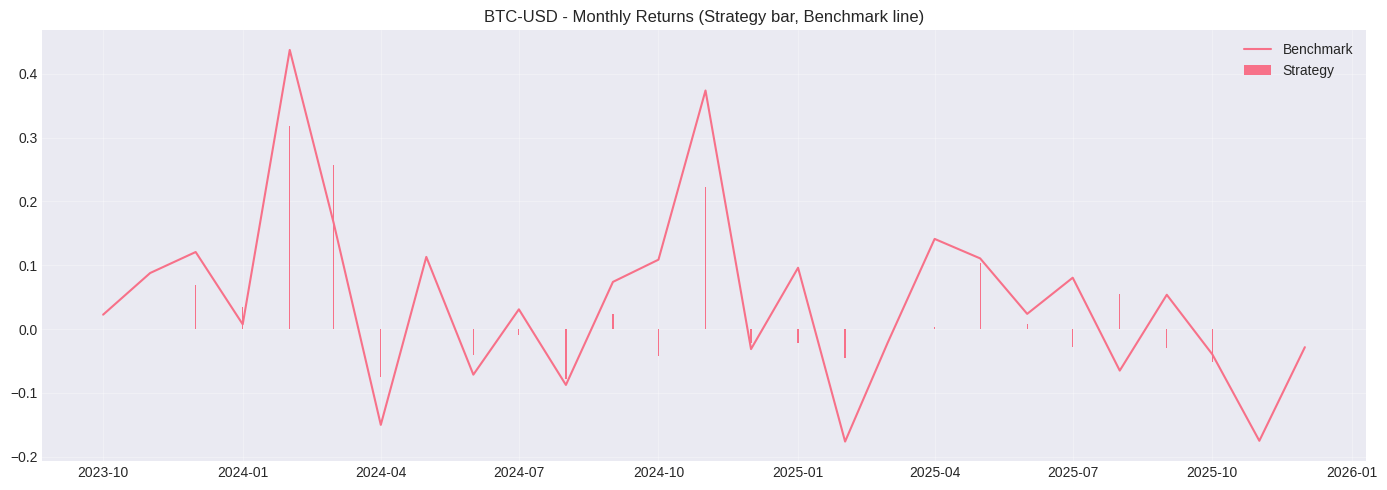

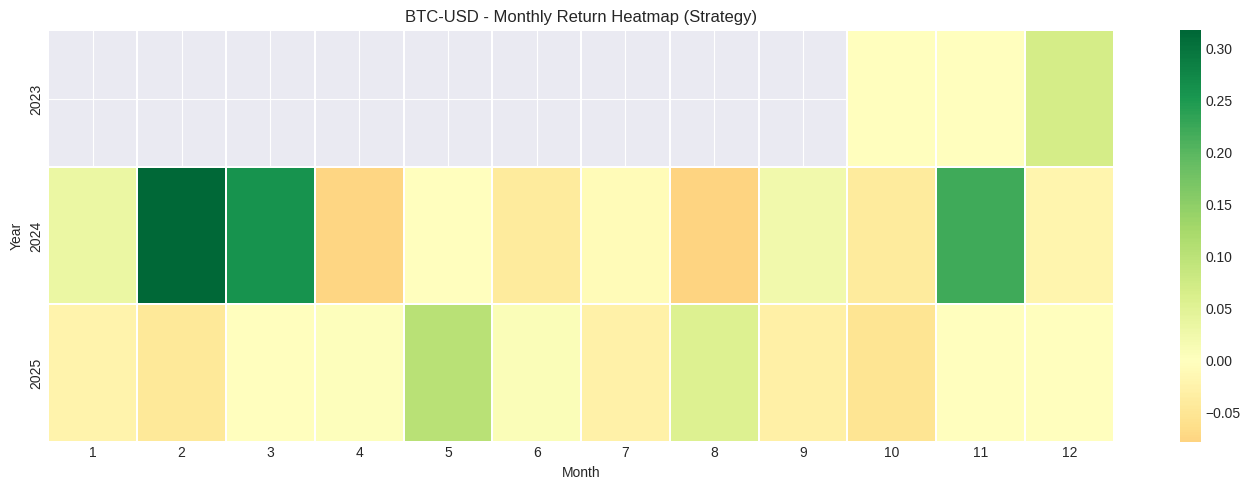

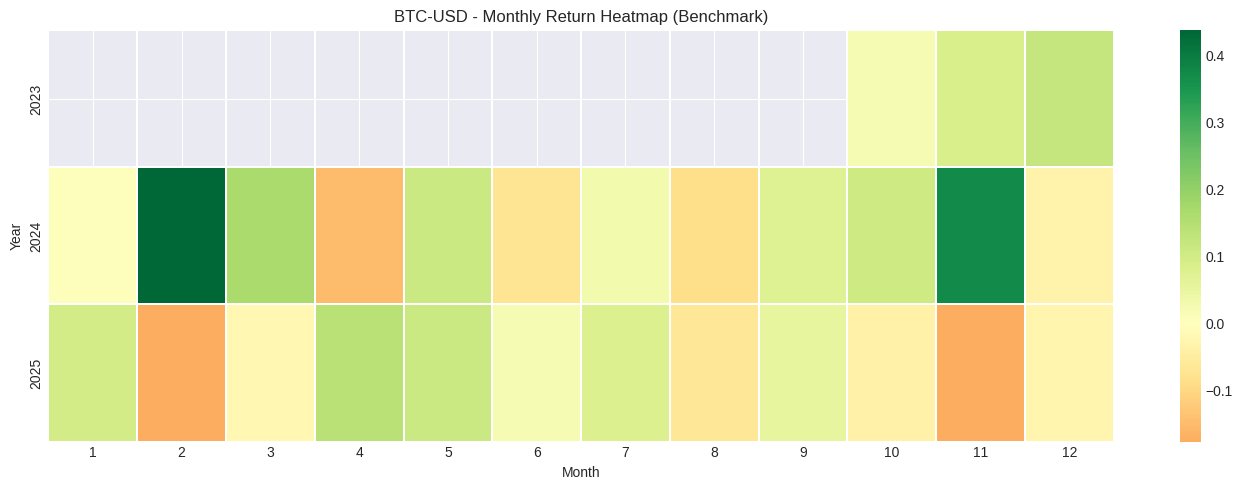

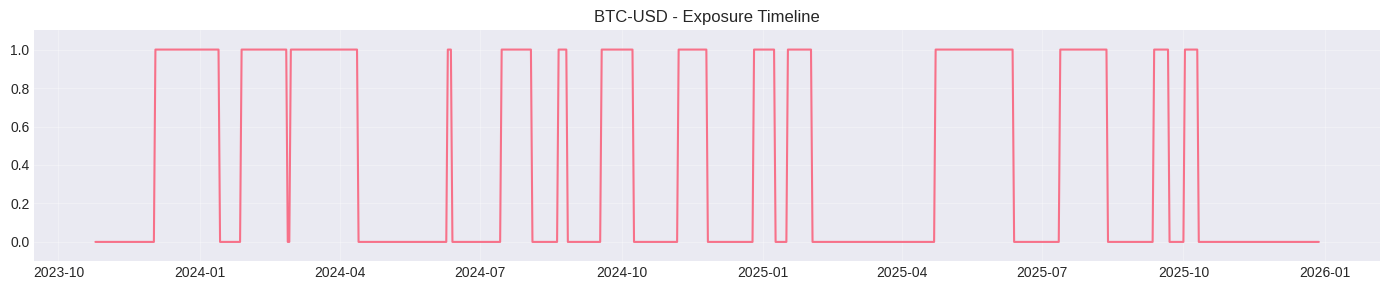


📊 Processing ETH-USD
------------------------------------------------------------
 📈 Total raw data: 2189 days
 🔄 WFV 1/5: Train=1194, Test=199 (2023-10-25 to 2024-05-10)


2025-12-29 13:02:59,997 | INFO | ETH-USD | ML validate precision_on_signals=0.312 | signals=32
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.312 | signals=32


 🔄 WFV 2/5: Train=1393, Test=199 (2024-05-11 to 2024-11-25)


2025-12-29 13:03:04,276 | INFO | ETH-USD | ML validate precision_on_signals=0.396 | signals=48
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.396 | signals=48


 🔄 WFV 3/5: Train=1592, Test=199 (2024-11-26 to 2025-06-12)


2025-12-29 13:03:06,643 | INFO | ETH-USD | ML validate precision_on_signals=0.366 | signals=41
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.366 | signals=41


 🔄 WFV 4/5: Train=1791, Test=199 (2025-06-13 to 2025-12-28)


2025-12-29 13:03:09,178 | INFO | ETH-USD | ML validate precision_on_signals=0.314 | signals=51
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.314 | signals=51


 📊 ETH-USD:
   Return: +167.92% vs B&H: +64.96% (+102.96%)
   Sharpe: 1.23 | Sortino: 1.62
   Win Rate: 22.4% | Profit Factor: 1.38
   Max DD: -19.22% | Exposure: 42.0%
   Avg Position: 87.5%


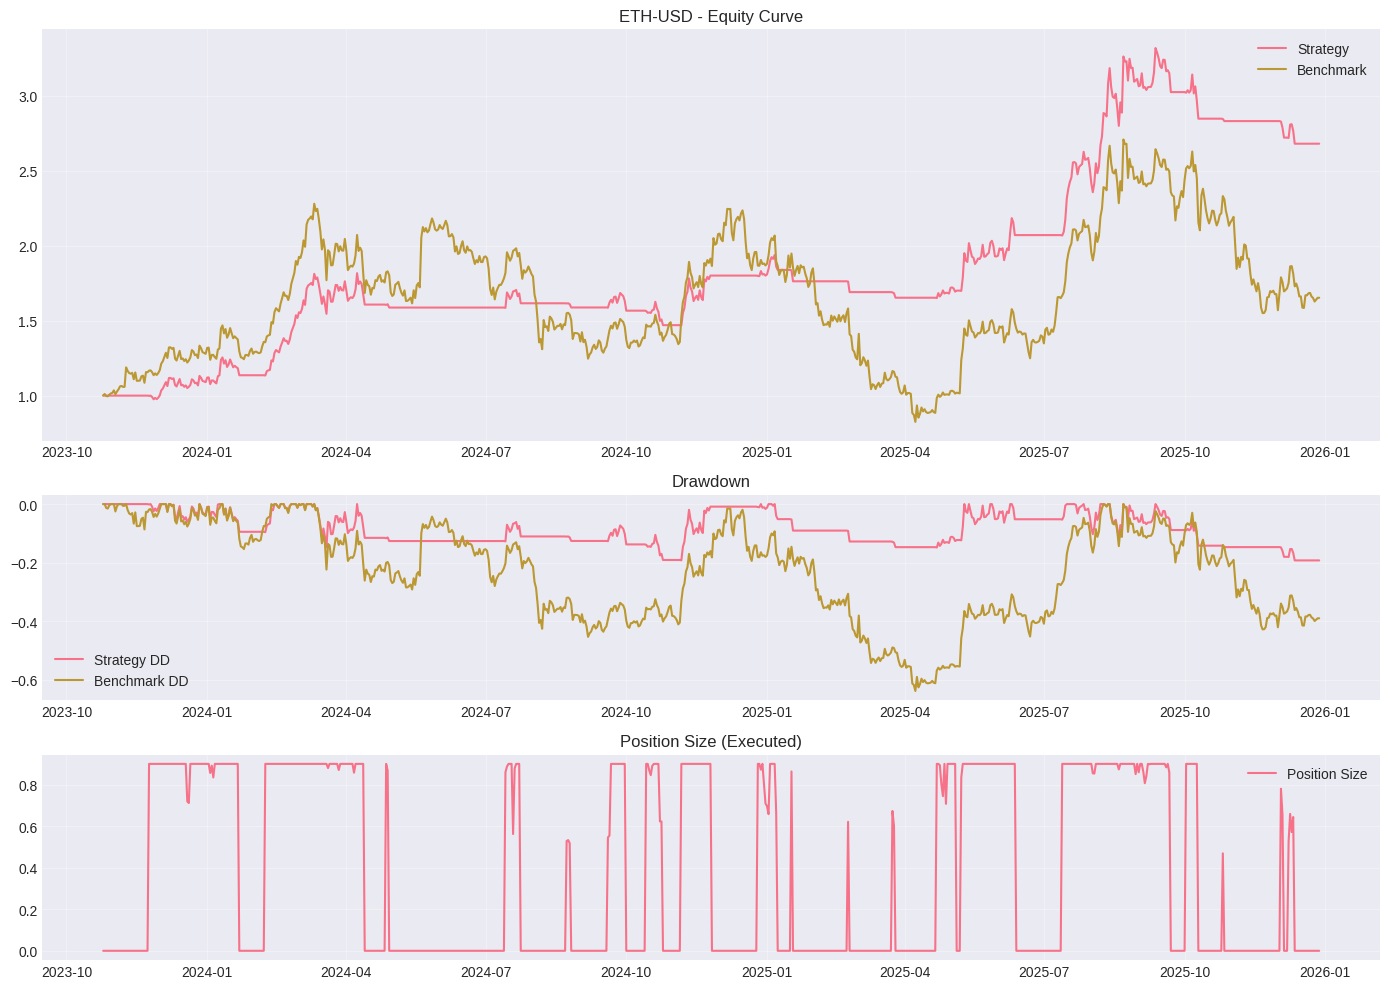

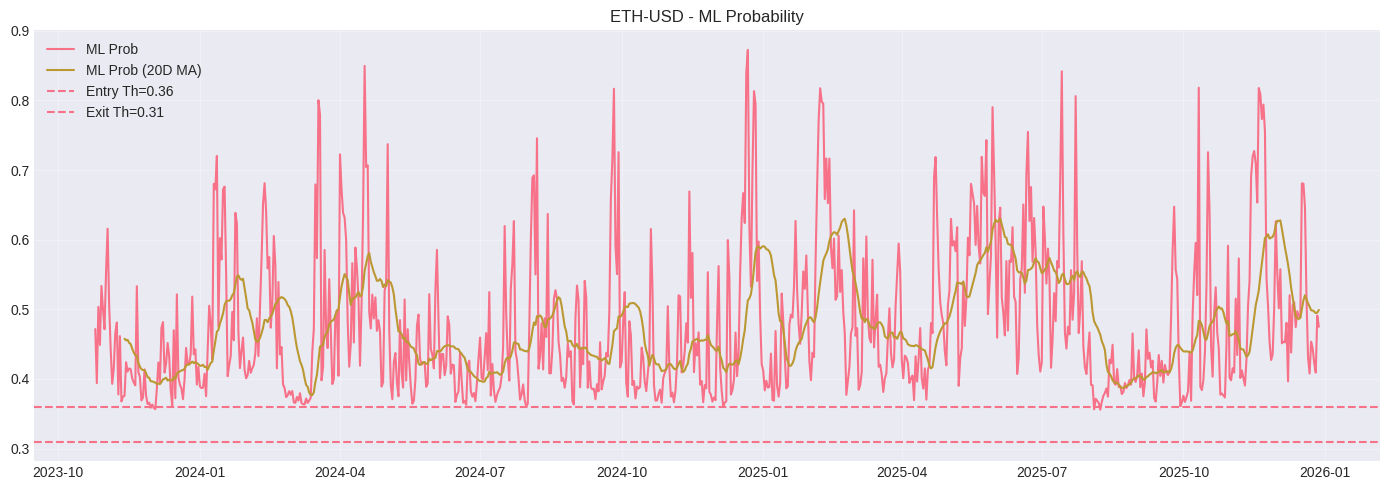

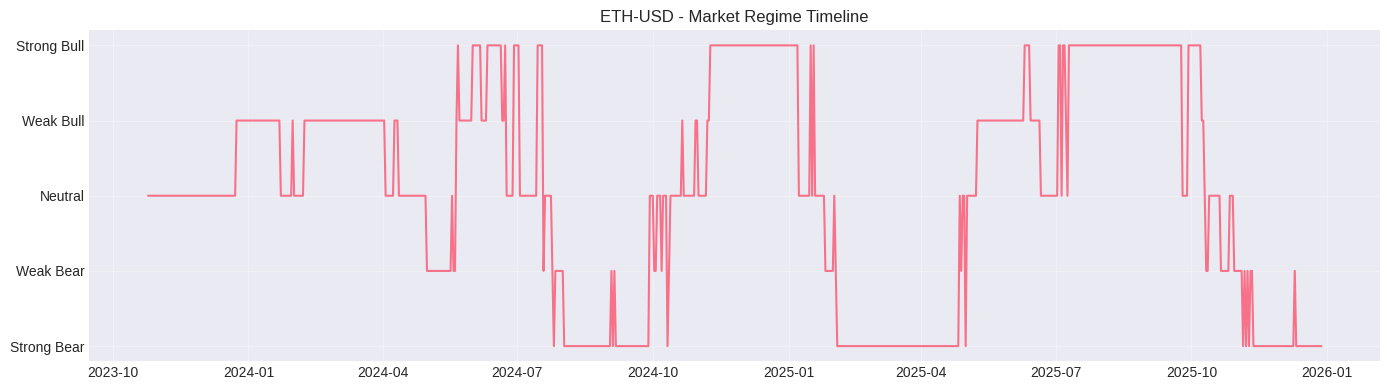

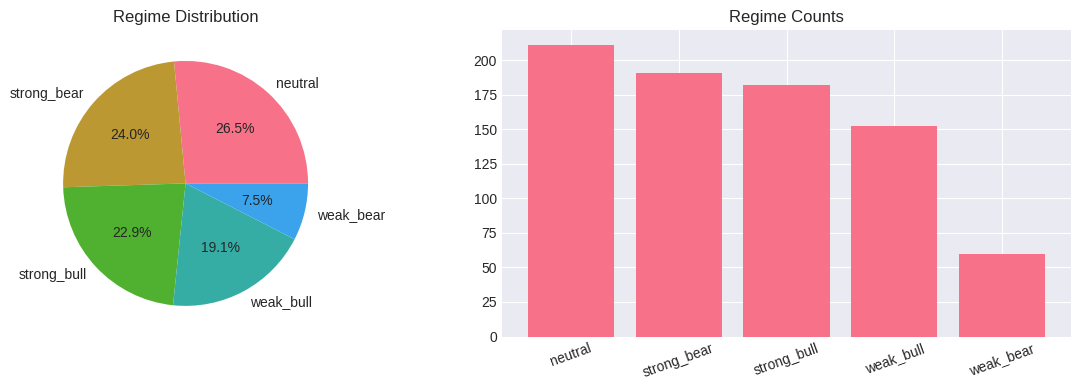

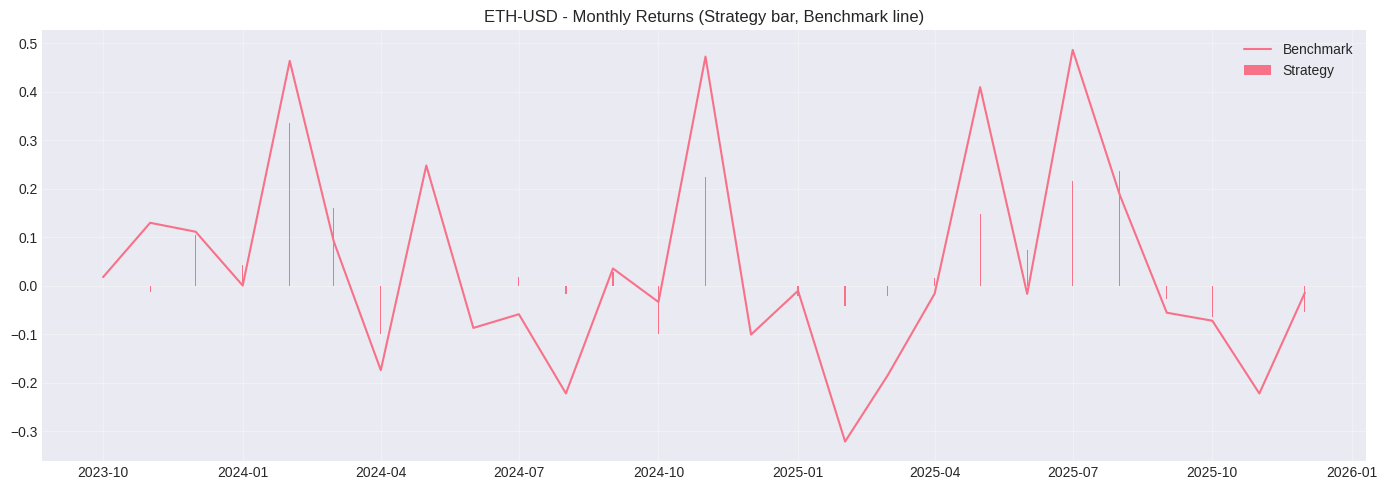

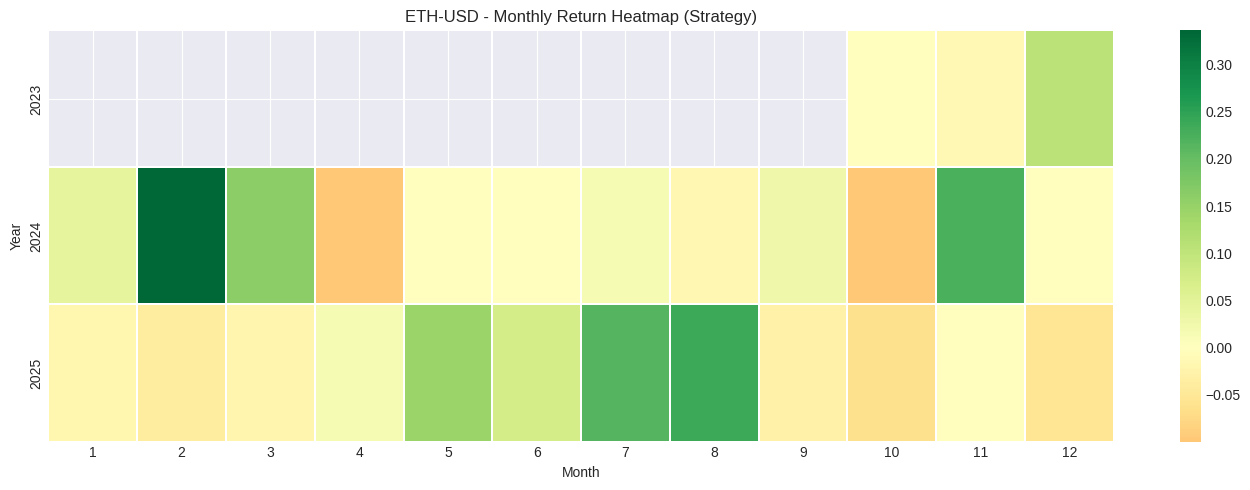

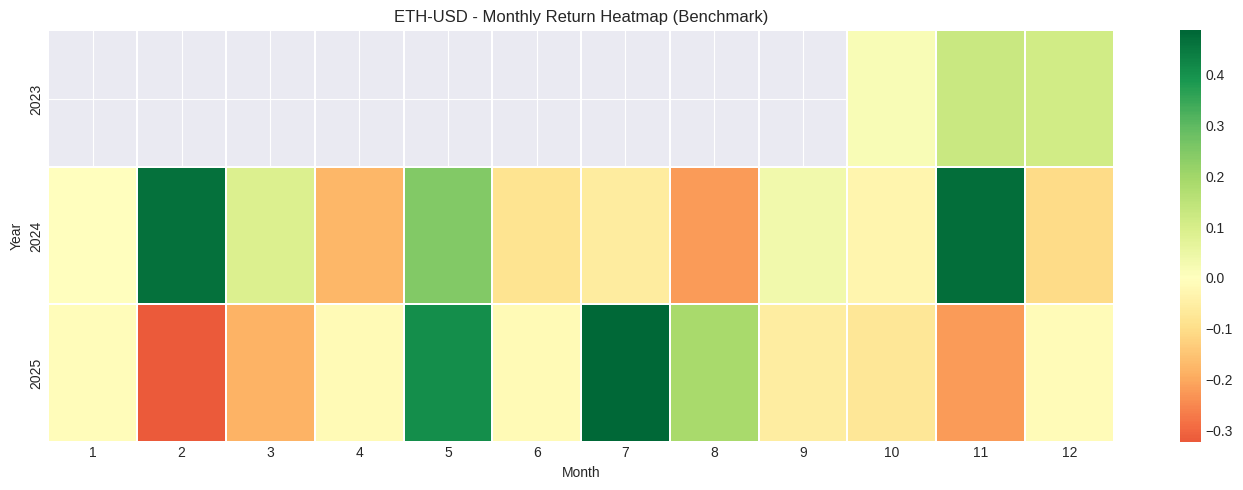

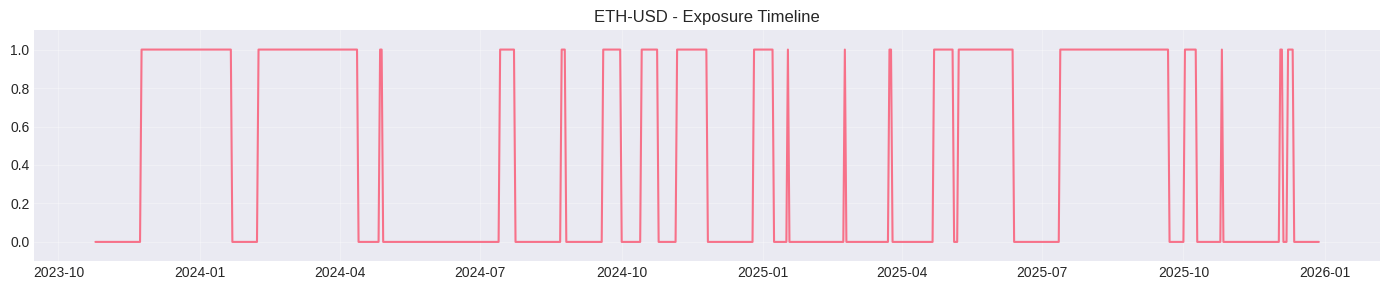


🏆 COMPREHENSIVE REPORT - V8.8 (PROFIT MAXIMIZER)

📈 PORTFOLIO:
   Total Return: +119.42%
   Benchmark: +117.30%
   🎯 Outperformance: +2.11%
   Sharpe: 1.24 | Sortino: 1.56
   Max DD: -20.49% | Win Rate: 25.9%

💼 ASSETS:
   BTC-USD: +71.26% vs B&H +159.09% (-87.83%)
   ETH-USD: +167.92% vs B&H +65.24% (+102.68%)

✅ PHASE 4 V8.8 COMPLETED


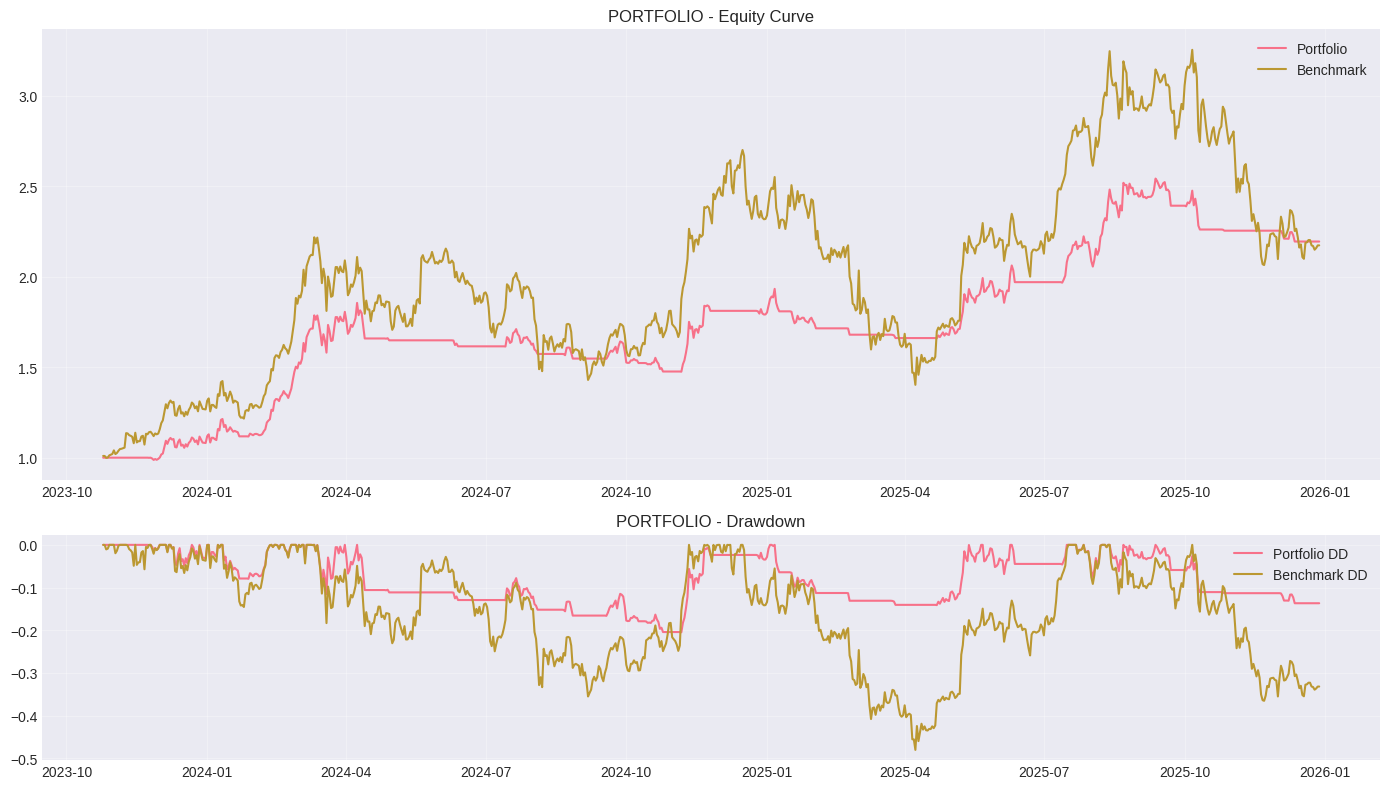

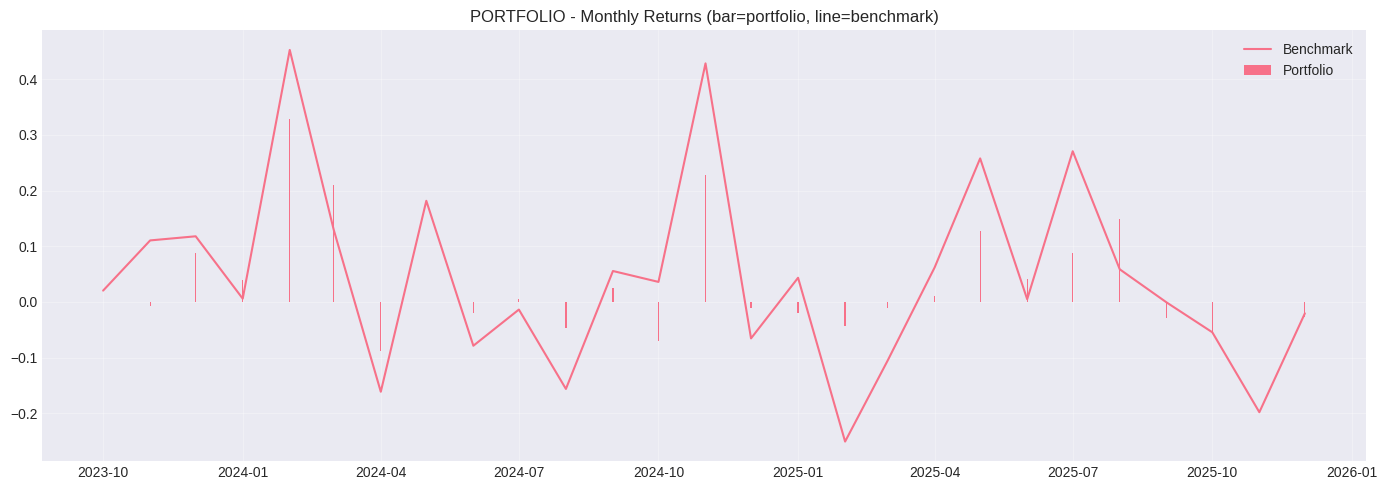

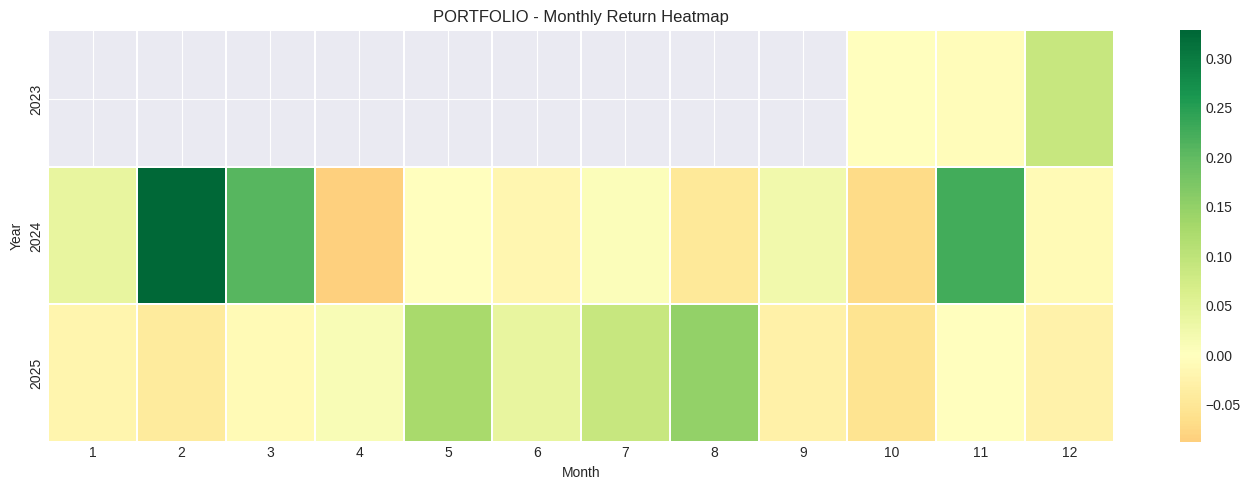

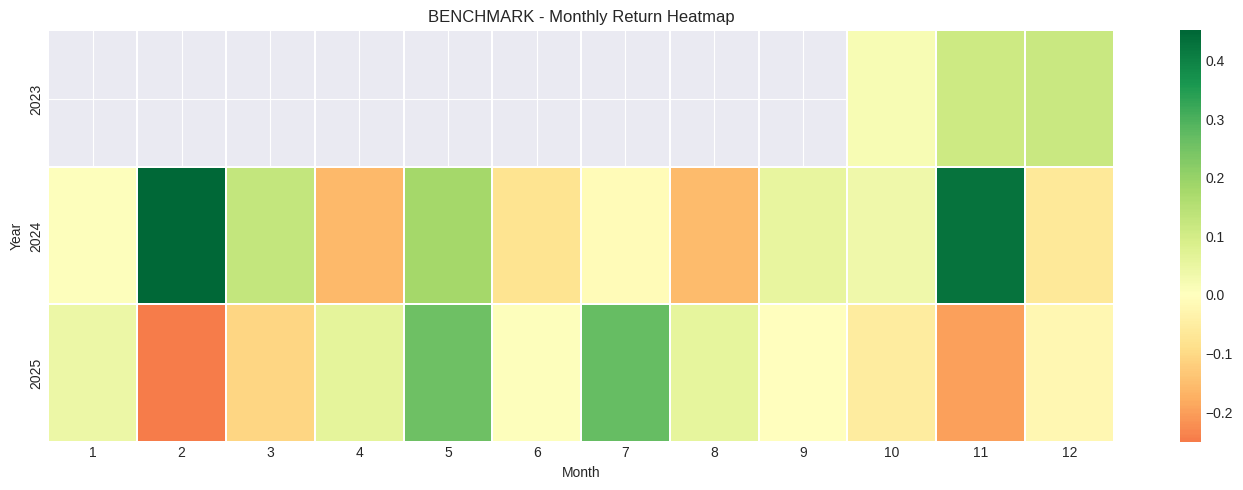

In [8]:
# ============================================================================
# 🚀 ML TRADING SYSTEM - PHASE 4: PROFIT MAXIMIZER V8.8 (FULL + VISUAL PACK)
# Author: DEWA
# Date: December 2025
# Status: GitHub-ready, with Market Regime + ML Prob + Monthly Return + Equity/DD
# ============================================================================
from __future__ import annotations

import warnings
import logging
from datetime import datetime
from typing import Dict, List, Tuple

import numpy as np
import pandas as pd
import yfinance as yf
import xgboost as xgb
import talib as ta

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Optional (heatmap)
import seaborn as sns

warnings.filterwarnings("ignore")


# =============================================================================
# LOGGING
# =============================================================================
def setup_logger(level: int = logging.INFO) -> logging.Logger:
    logger = logging.getLogger("profit_maximizer_v88")
    if logger.handlers:
        return logger
    logger.setLevel(level)
    h = logging.StreamHandler()
    fmt = logging.Formatter("%(asctime)s | %(levelname)s | %(message)s")
    h.setFormatter(fmt)
    logger.addHandler(h)
    return logger


log = setup_logger(logging.INFO)


# =============================================================================
# VISUAL + METRIC UTILITIES
# =============================================================================
def compute_equity_curve(returns: pd.Series, start_value: float = 1.0) -> pd.Series:
    if returns.empty:
        return pd.Series(dtype=float)
    return start_value * (1.0 + returns.fillna(0.0)).cumprod()


def compute_drawdown(equity: pd.Series) -> pd.Series:
    if equity.empty:
        return pd.Series(dtype=float)
    rm = equity.cummax()
    return (equity - rm) / rm


def to_monthly_returns(daily_returns: pd.Series) -> pd.Series:
    if daily_returns.empty:
        return pd.Series(dtype=float)
    m = (1.0 + daily_returns.fillna(0.0)).groupby(pd.Grouper(freq="M")).prod() - 1.0
    m.index = m.index.to_period("M").to_timestamp()
    return m


def monthly_heatmap(series: pd.Series, title: str):
    """
    Heatmap monthly returns with Year x Month layout.
    """
    if series.empty:
        return
    df = series.copy()
    df.index = pd.to_datetime(df.index)

    heat = pd.DataFrame({"ret": df.values}, index=df.index)
    heat["Year"] = heat.index.year
    heat["Month"] = heat.index.month

    pivot = heat.pivot_table(index="Year", columns="Month", values="ret", aggfunc="mean").sort_index()
    pivot = pivot.reindex(columns=range(1, 13))

    plt.figure(figsize=(14, 5))
    sns.heatmap(pivot, annot=False, center=0.0, cmap="RdYlGn", linewidths=0.3)
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.tight_layout()
    plt.show()


# =============================================================================
# 1. CONFIG V8.8
# =============================================================================
class ConfigV88:
    ASSETS = ["BTC-USD", "ETH-USD"]

    ASSET_PARAMS: Dict[str, Dict[str, float]] = {
        "BTC-USD": {
            "base_position": 0.80,
            "max_position": 0.95,
            "min_position": 0.50,
            "entry_threshold": 0.38,
            "exit_threshold": 0.33,
            "stop_loss": 0.08,
            "take_profit": 0.30,
            "trailing_stop": 0.12,
            "volatility_mult": 1.0,
            "trend_mult": 1.5,
        },
        "ETH-USD": {
            "base_position": 0.75,
            "max_position": 0.90,
            "min_position": 0.40,
            "entry_threshold": 0.36,
            "exit_threshold": 0.31,
            "stop_loss": 0.09,
            "take_profit": 0.35,
            "trailing_stop": 0.15,
            "volatility_mult": 0.9,
            "trend_mult": 1.6,
        },
    }

    COMMISSION = 0.001
    SLIPPAGE = 0.0005

    XGB_PARAMS = {
        "n_estimators": 250,
        "max_depth": 7,
        "learning_rate": 0.04,
        "subsample": 0.85,
        "colsample_bytree": 0.85,
        "reg_alpha": 0.05,
        "reg_lambda": 0.8,
        "random_state": 42,
        "n_jobs": -1,
        "eval_metric": "logloss",
        "use_label_encoder": False,
    }

    MAX_PORTFOLIO_DRAWDOWN = 0.30
    MAX_DAILY_LOSS = 0.04

    WFV_TRAIN_SIZE = 0.6
    WFV_STEP_SIZE = 0.1
    WFV_WINDOWS = 5

    START_DATE = "2020-01-01"
    END_DATE = "2025-12-29"


# =============================================================================
# 2. ENHANCED ML ENGINE V8.8
# =============================================================================
class EnhancedMLEngineV88:
    def __init__(self, symbol: str):
        self.symbol = symbol
        self.model = xgb.XGBClassifier(**ConfigV88.XGB_PARAMS)
        self.scaler = StandardScaler()
        self.is_trained = False

    def prepare_features(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, List[str]]:
        df = df.copy()

        df["RETURN"] = df["Close"].pct_change()
        df["LOG_RETURN"] = np.log(df["Close"] / df["Close"].shift(1))

        df["VOLATILITY_5"] = df["RETURN"].rolling(5).std()
        df["VOLATILITY_10"] = df["RETURN"].rolling(10).std()
        df["VOLATILITY_20"] = df["RETURN"].rolling(20).std()
        df["VOLATILITY_RATIO"] = df["VOLATILITY_5"] / df["VOLATILITY_20"]

        df["RSI"] = ta.RSI(df["Close"], timeperiod=14)
        df["RSI_7"] = ta.RSI(df["Close"], timeperiod=7)
        df["RSI_21"] = ta.RSI(df["Close"], timeperiod=21)
        df["RSI_SLOPE"] = df["RSI"].diff(3)

        df["MACD"], df["MACD_SIGNAL"], df["MACD_HIST"] = ta.MACD(df["Close"])
        df["MACD_HIST_SLOPE"] = df["MACD_HIST"].diff(2)

        df["EMA_5"] = ta.EMA(df["Close"], timeperiod=5)
        df["EMA_10"] = ta.EMA(df["Close"], timeperiod=10)
        df["EMA_20"] = ta.EMA(df["Close"], timeperiod=20)
        df["EMA_50"] = ta.EMA(df["Close"], timeperiod=50)
        df["EMA_200"] = ta.EMA(df["Close"], timeperiod=200)

        df["PRICE_EMA5_RATIO"] = df["Close"] / df["EMA_5"]
        df["PRICE_EMA20_RATIO"] = df["Close"] / df["EMA_20"]
        df["PRICE_EMA50_RATIO"] = df["Close"] / df["EMA_50"]

        df["VOLUME_SMA"] = df["Volume"].rolling(20).mean()
        df["VOLUME_RATIO"] = df["Volume"] / df["VOLUME_SMA"]
        df["VOLUME_TREND"] = df["VOLUME_SMA"].pct_change(5)

        df["ATR"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["ATR_PCT"] = df["ATR"] / df["Close"]
        df["ATR_TREND"] = df["ATR"].pct_change(5)

        df["ADX"] = ta.ADX(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["DI_PLUS"] = ta.PLUS_DI(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["DI_MINUS"] = ta.MINUS_DI(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["DI_DIFF"] = df["DI_PLUS"] - df["DI_MINUS"]

        df["HIGH_20"] = df["High"].rolling(20).max()
        df["LOW_20"] = df["Low"].rolling(20).min()
        df["PRICE_POSITION"] = (df["Close"] - df["LOW_20"]) / (df["HIGH_20"] - df["LOW_20"])

        df["BB_UPPER"], df["BB_MIDDLE"], df["BB_LOWER"] = ta.BBANDS(df["Close"])
        df["BB_WIDTH"] = (df["BB_UPPER"] - df["BB_LOWER"]) / df["BB_MIDDLE"]
        df["BB_POSITION"] = (df["Close"] - df["BB_LOWER"]) / (df["BB_UPPER"] - df["BB_LOWER"])

        df["TREND"] = self._calculate_enhanced_trend(df)

        df["MOM_5"] = ta.MOM(df["Close"], timeperiod=5)
        df["MOM_10"] = ta.MOM(df["Close"], timeperiod=10)
        df["ROC"] = ta.ROC(df["Close"], timeperiod=10)

        for lag in [1, 2, 3, 5]:
            df[f"RETURN_LAG_{lag}"] = df["RETURN"].shift(lag)
            df[f"RSI_LAG_{lag}"] = df["RSI"].shift(lag)
            df[f"VOLUME_RATIO_LAG_{lag}"] = df["VOLUME_RATIO"].shift(lag)

        # Target: next 3-day move > 2%
        df["TARGET"] = (df["Close"].shift(-3) > df["Close"] * 1.02).astype(int)

        features = [
            "RETURN",
            "LOG_RETURN",
            "VOLATILITY_5",
            "VOLATILITY_10",
            "VOLATILITY_20",
            "VOLATILITY_RATIO",
            "RSI",
            "RSI_7",
            "RSI_21",
            "RSI_SLOPE",
            "MACD",
            "MACD_HIST",
            "MACD_HIST_SLOPE",
            "EMA_5",
            "EMA_10",
            "EMA_20",
            "EMA_50",
            "EMA_200",
            "PRICE_EMA5_RATIO",
            "PRICE_EMA20_RATIO",
            "PRICE_EMA50_RATIO",
            "VOLUME_RATIO",
            "VOLUME_TREND",
            "ATR_PCT",
            "ATR_TREND",
            "ADX",
            "DI_DIFF",
            "PRICE_POSITION",
            "BB_WIDTH",
            "BB_POSITION",
            "TREND",
            "MOM_5",
            "MOM_10",
            "ROC",
            "RETURN_LAG_1",
            "RETURN_LAG_2",
            "RETURN_LAG_3",
            "RSI_LAG_1",
            "RSI_LAG_2",
            "RSI_LAG_3",
            "VOLUME_RATIO_LAG_1",
            "VOLUME_RATIO_LAG_2",
        ]

        available = [f for f in features if f in df.columns]
        df_clean = df.dropna(subset=available + ["TARGET", "Close"])
        return df_clean, available

    def _calculate_enhanced_trend(self, df: pd.DataFrame) -> pd.Series:
        close = df["Close"].values
        if len(close) < 200:
            return pd.Series(0.0, index=df.index)

        ema_20 = ta.EMA(close, timeperiod=20)
        ema_50 = ta.EMA(close, timeperiod=50)
        ema_200 = ta.EMA(close, timeperiod=200)

        trend = np.zeros(len(close), dtype=float)
        for i in range(len(close)):
            if i < 200:
                continue
            c = close[i]
            if c > ema_20[i] > ema_50[i] > ema_200[i]:
                trend[i] = 1.5
            elif c > ema_20[i] > ema_50[i]:
                trend[i] = 1.0
            elif c > ema_20[i]:
                trend[i] = 0.5
            elif c < ema_20[i] < ema_50[i] < ema_200[i]:
                trend[i] = -1.5
            elif c < ema_20[i] < ema_50[i]:
                trend[i] = -1.0
            elif c < ema_20[i]:
                trend[i] = -0.5
        return pd.Series(trend, index=df.index)

    def train(self, df: pd.DataFrame, features: List[str]) -> bool:
        if len(df) < 100:
            return False

        X = df[features].values
        y = df["TARGET"].values

        split = int(len(X) * 0.8)
        X_train, X_val = X[:split], X[split:]
        y_train, y_val = y[:split], y[split:]

        X_train_s = self.scaler.fit_transform(X_train)
        X_val_s = self.scaler.transform(X_val)

        self.model.fit(X_train_s, y_train, eval_set=[(X_val_s, y_val)], verbose=False)

        pred = self.model.predict(X_val_s)
        precision_on_signals = float(np.mean(y_val[pred == 1])) if np.sum(pred) > 0 else 0.0
        log.info(f"{self.symbol} | ML validate precision_on_signals={precision_on_signals:.3f} | signals={int(np.sum(pred))}")

        self.is_trained = True
        return True

    def predict(self, df: pd.DataFrame, features: List[str]) -> np.ndarray:
        if not self.is_trained or len(df) == 0:
            return np.full(len(df), 0.5)

        available = [f for f in features if f in df.columns]
        if not available:
            return np.full(len(df), 0.5)

        X = self.scaler.transform(df[available].values)
        proba = self.model.predict_proba(X)[:, 1]

        # calibrated range
        proba = 0.35 + 0.55 * proba  # [0.35, 0.90]
        return np.clip(proba, 0.30, 0.90)


# =============================================================================
# 3. STRATEGY V8.8 (FIXED STATEFUL POSITION + TRAILING)
# =============================================================================
class ProfitMaximizedStrategy:
    def __init__(self, symbol: str):
        self.symbol = symbol
        self.params = ConfigV88.ASSET_PARAMS[symbol]
        self.pos_open = False
        self.entry_price = 0.0
        self.peak_price = 0.0
        self.last_strength = 0.0

    def generate_signals(self, df: pd.DataFrame, ml_probs: np.ndarray) -> Tuple[pd.Series, pd.Series]:
        n = len(df)
        signals = pd.Series(0, index=df.index, dtype=int)
        strengths = pd.Series(0.0, index=df.index, dtype=float)

        if n < 30:
            return signals, strengths

        close = df["Close"].values
        rsi = df["RSI"].values if "RSI" in df.columns else np.full(n, 50.0)
        adx = df["ADX"].values if "ADX" in df.columns else np.full(n, 25.0)
        volume_ratio = df["VOLUME_RATIO"].values if "VOLUME_RATIO" in df.columns else np.ones(n)

        ema_20 = df["EMA_20"].values if "EMA_20" in df.columns else close
        ema_50 = df["EMA_50"].values if "EMA_50" in df.columns else close
        trend = df["TREND"].values if "TREND" in df.columns else np.zeros(n)

        for i in range(30, n):
            price = float(close[i])

            # -------------------
            # Position management
            # -------------------
            if self.pos_open:
                profit_pct = (price - self.entry_price) / self.entry_price
                self.peak_price = max(self.peak_price, price)
                dd_from_peak = (price - self.peak_price) / self.peak_price

                # trailing stop active after +10%
                if profit_pct > 0.10 and dd_from_peak < -self.params["trailing_stop"]:
                    self._close()
                elif profit_pct > self.params["take_profit"]:
                    self._close()
                elif profit_pct < -self.params["stop_loss"]:
                    self._close()

            # -------------------
            # Entry
            # -------------------
            if not self.pos_open:
                ml_ok = float(ml_probs[i]) > self.params["entry_threshold"]
                trend_ok = (price > float(ema_20[i])) or (float(trend[i]) >= 0.5)
                rsi_ok = 25.0 < float(rsi[i]) < 85.0
                vol_ok = float(volume_ratio[i]) > 0.5
                adx_ok = float(adx[i]) > 15.0

                momentum_ok = True
                if "MOM_10" in df.columns:
                    momentum_ok = float(df["MOM_10"].iloc[i]) > 0.0

                if ml_ok and trend_ok and rsi_ok and vol_ok and adx_ok and momentum_ok:
                    self._open(price)
                    strength = self._calc_strength(
                        ml_prob=float(ml_probs[i]),
                        trend=float(trend[i]),
                        price=price,
                        ema_20=float(ema_20[i]),
                        volume_ratio=float(volume_ratio[i]),
                        adx=float(adx[i]),
                        rsi=float(rsi[i]),
                    )
                    self.last_strength = strength

            # -------------------
            # Soft Exit
            # -------------------
            if self.pos_open:
                exit_conditions = [
                    float(ml_probs[i]) < self.params["exit_threshold"],
                    float(trend[i]) < -0.5,
                    float(rsi[i]) < 30.0,
                    (price < float(ema_50[i]) and float(adx[i]) < 20.0),
                ]
                if any(exit_conditions):
                    self._close()

            signals.iloc[i] = 1 if self.pos_open else 0
            strengths.iloc[i] = self.last_strength if self.pos_open else 0.0

        return signals, strengths

    def _open(self, price: float) -> None:
        self.pos_open = True
        self.entry_price = price
        self.peak_price = price

    def _close(self) -> None:
        self.pos_open = False
        self.entry_price = 0.0
        self.peak_price = 0.0
        self.last_strength = 0.0

    @staticmethod
    def _calc_strength(
        ml_prob: float,
        trend: float,
        price: float,
        ema_20: float,
        volume_ratio: float,
        adx: float,
        rsi: float,
    ) -> float:
        strength = 0.0

        ml_strength = (ml_prob - 0.35) / 0.55
        strength += 0.40 * float(np.clip(ml_strength, 0.0, 1.0))

        if trend >= 1.0:
            strength += 0.30
        elif trend >= 0.5:
            strength += 0.20
        elif price > ema_20:
            strength += 0.10

        if volume_ratio > 1.5:
            strength += 0.15
        elif volume_ratio > 1.0:
            strength += 0.10
        elif volume_ratio > 0.7:
            strength += 0.05

        if adx > 30:
            strength += 0.10
        elif adx > 20:
            strength += 0.05

        if 45 < rsi < 65:
            strength += 0.05

        return float(np.clip(strength, 0.2, 1.0))


# =============================================================================
# 4. POSITION SIZER V8.8
# =============================================================================
class EnhancedPositionSizer:
    def calculate_position(
        self,
        asset: str,
        signal_strength: float,
        ml_prob: float,
        volatility: float,
        trend: float,
        market_regime: str,
    ) -> float:
        p = ConfigV88.ASSET_PARAMS[asset]

        base = float(p["base_position"])

        # strength
        base *= float(0.6 + 0.6 * signal_strength)

        # ML confidence
        ml_adj = 0.8 + 0.8 * (ml_prob - 0.4) * 2.0
        base *= float(np.clip(ml_adj, 0.7, 1.5))

        # volatility
        vol_adj = float(p["volatility_mult"]) / max(float(volatility), 0.01)
        base *= float(np.clip(vol_adj, 0.7, 1.3))

        # trend
        if trend > 1.0:
            base *= float(1.0 + p["trend_mult"] * 0.8)
        elif trend > 0.5:
            base *= float(1.0 + p["trend_mult"] * 0.5)
        elif trend > 0.0:
            base *= float(1.0 + p["trend_mult"] * 0.2)

        regime_mult = {
            "strong_bull": 1.4,
            "weak_bull": 1.2,
            "neutral": 1.0,
            "weak_bear": 0.6,
            "strong_bear": 0.4,
        }.get(market_regime, 1.0)
        base *= float(regime_mult)

        return float(np.clip(base, p["min_position"], p["max_position"]))


# =============================================================================
# 5. MARKET REGIME DETECTOR
# =============================================================================
class MarketRegimeDetector:
    def __init__(self, lookback_days: int = 60):
        self.lookback = lookback_days

    def detect_regime(self, df: pd.DataFrame, current_idx: int) -> str:
        if current_idx < self.lookback:
            return "neutral"

        start_idx = max(0, current_idx - self.lookback)
        recent = df.iloc[start_idx:current_idx]
        if len(recent) < 20:
            return "neutral"

        returns = recent["Close"].pct_change().dropna()
        if len(returns) < 10:
            return "neutral"

        avg_return = float(returns.mean() * 252)
        vol = float(returns.std() * np.sqrt(252))
        sharpe = avg_return / vol if vol > 0 else 0.0

        current_price = float(df["Close"].iloc[current_idx - 1])
        sma_50 = float(df["Close"].rolling(50).mean().iloc[current_idx - 1])
        sma_200 = float(df["Close"].rolling(200).mean().iloc[current_idx - 1])

        if current_price > sma_200 and sharpe > 1.0:
            return "strong_bull"
        if current_price > sma_50 and sharpe > 0.5:
            return "weak_bull"
        if current_price < sma_200 and sharpe < -1.0:
            return "strong_bear"
        if current_price < sma_50 and sharpe < -0.5:
            return "weak_bear"
        return "neutral"


# =============================================================================
# 6. MAIN SYSTEM V8.8 + VISUALS
# =============================================================================
class ProfitMaximizedSystemV88:
    def __init__(self):
        self.config = ConfigV88()
        self.ml_engines: Dict[str, EnhancedMLEngineV88] = {}
        self.strategies: Dict[str, ProfitMaximizedStrategy] = {}
        self.position_sizer = EnhancedPositionSizer()
        self.regime_detector = MarketRegimeDetector()
        self.results: Dict[str, Dict[str, object]] = {}

    def run(self, make_plots: bool = True):
        print("\n" + "=" * 80)
        print("🚀 ML TRADING SYSTEM - PHASE 4 V8.8 (PROFIT MAXIMIZER + VISUAL PACK)")
        print("=" * 80)

        for symbol in self.config.ASSETS:
            print(f"\n📊 Processing {symbol}")
            print("-" * 60)

            self.ml_engines[symbol] = EnhancedMLEngineV88(symbol)
            self.strategies[symbol] = ProfitMaximizedStrategy(symbol)

            df = self.fetch_data(symbol)
            if df.empty:
                print("❌ Empty data, skip.")
                continue

            print(f" 📈 Total raw data: {len(df)} days")
            df_clean, features = self.ml_engines[symbol].prepare_features(df)

            if len(df_clean) < 500:
                print(f" ❌ Insufficient clean data: {len(df_clean)}")
                continue

            total_windows = self.config.WFV_WINDOWS
            train_frac = self.config.WFV_TRAIN_SIZE
            step_size = int(len(df_clean) * self.config.WFV_STEP_SIZE)

            all_signals = []
            all_strengths = []
            all_positions = []
            all_returns = []
            all_ml_probs = []

            for w in range(total_windows):
                train_end = int(len(df_clean) * (train_frac + w * self.config.WFV_STEP_SIZE))
                test_start = train_end
                test_end = min(test_start + step_size, len(df_clean))

                if test_end - test_start < 30:
                    break

                train_df = df_clean.iloc[:train_end]
                test_df = df_clean.iloc[test_start:test_end]

                print(
                    f" 🔄 WFV {w+1}/{total_windows}: Train={len(train_df)}, Test={len(test_df)} "
                    f"({test_df.index[0].date()} to {test_df.index[-1].date()})"
                )

                trained = self.ml_engines[symbol].train(train_df, features)
                ml_probs = self.ml_engines[symbol].predict(test_df, features) if trained else np.full(len(test_df), 0.6)

                signals, strengths = self.strategies[symbol].generate_signals(test_df, ml_probs)
                positions = self.calculate_positions(symbol, test_df, signals, strengths, ml_probs)
                returns = self.calculate_returns(test_df, positions)

                all_signals.append(signals)
                all_strengths.append(strengths)
                all_positions.append(positions)
                all_returns.append(returns)
                all_ml_probs.append(pd.Series(ml_probs, index=test_df.index))

            if not all_returns:
                print(" ❌ No valid results.")
                continue

            sig = pd.concat(all_signals)
            stg = pd.concat(all_strengths)
            pos = pd.concat(all_positions)
            ret = pd.concat(all_returns)
            probs = pd.concat(all_ml_probs)

            bench = df_clean["Close"].pct_change().fillna(0).reindex(ret.index)
            test_data = df_clean.reindex(ret.index)

            self.results[symbol] = {
                "returns": ret,
                "signals": sig,
                "positions": pos,
                "strengths": stg,
                "ml_probs": probs,
                "benchmark": bench,
                "test_data": test_data,
            }

            self.print_metrics(symbol)

            if make_plots:
                self.plot_asset_visuals(symbol)

        if self.results:
            self.generate_comprehensive_report()
            if make_plots:
                self.plot_portfolio_visuals()
        else:
            print("\n❌ No results generated")

    def fetch_data(self, symbol: str) -> pd.DataFrame:
        try:
            df = yf.download(
                symbol,
                start=self.config.START_DATE,
                end=self.config.END_DATE,
                interval="1d",
                progress=False,
                auto_adjust=True,
            )

            if df is None or df.empty:
                return pd.DataFrame()

            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.get_level_values(0)

            required = ["Open", "High", "Low", "Close", "Volume"]
            for c in required:
                if c not in df.columns:
                    df[c] = np.nan

            df = df[required].astype(float).dropna()
            return df
        except Exception as e:
            print(f"❌ Error fetch_data: {e}")
            return pd.DataFrame()

    def calculate_positions(
        self,
        symbol: str,
        df: pd.DataFrame,
        signals: pd.Series,
        strengths: pd.Series,
        ml_probs: np.ndarray,
    ) -> pd.Series:
        positions = pd.Series(0.0, index=df.index)

        vol = df["ATR_PCT"].values if "ATR_PCT" in df.columns else np.full(len(df), 0.02)
        trd = df["TREND"].values if "TREND" in df.columns else np.zeros(len(df))

        for i in range(len(df)):
            if int(signals.iloc[i]) == 1:
                regime = self.regime_detector.detect_regime(df, i)
                positions.iloc[i] = self.position_sizer.calculate_position(
                    asset=symbol,
                    signal_strength=float(strengths.iloc[i]),
                    ml_prob=float(ml_probs[i]),
                    volatility=float(vol[i]) if i < len(vol) else 0.02,
                    trend=float(trd[i]) if i < len(trd) else 0.0,
                    market_regime=regime,
                )

        return positions

    def calculate_returns(self, df: pd.DataFrame, positions: pd.Series) -> pd.Series:
        if "Close" not in df.columns:
            return pd.Series(dtype=float)

        asset_returns = df["Close"].pct_change().fillna(0.0)

        pos_exec = positions.shift(1).fillna(0.0)
        gross = pos_exec * asset_returns

        changes = positions.diff().abs().fillna(0.0)
        costs = changes * (self.config.COMMISSION + self.config.SLIPPAGE)

        net = gross - costs
        net = net.clip(lower=-self.config.MAX_DAILY_LOSS)
        return net.fillna(0.0)

    def print_metrics(self, symbol: str):
        res = self.results[symbol]
        returns = res["returns"]
        bench = res["benchmark"]
        signals = res["signals"]
        positions = res["positions"]
        df = res["test_data"]

        total_return = float((1 + returns).prod() - 1)
        bh_return = float((1 + df["Close"].pct_change().fillna(0)).prod() - 1)

        std = float(returns.std())
        sharpe = float(returns.mean() / std * np.sqrt(252)) if std > 0 else 0.0

        downside = returns[returns < 0]
        downside_std = float(downside.std()) if len(downside) > 0 else 0.0
        sortino = float(returns.mean() / downside_std * np.sqrt(252)) if downside_std > 0 else 0.0

        win_rate = float((returns > 0).mean() * 100)

        wins = returns[returns > 0].sum()
        losses = returns[returns < 0].sum()
        profit_factor = float(abs(wins / losses)) if losses != 0 else float("inf")

        equity = compute_equity_curve(returns)
        dd = compute_drawdown(equity)
        max_dd = float(dd.min())

        exposure = float(signals.mean() * 100.0)
        avg_pos = float(positions[positions > 0].mean()) if (positions > 0).any() else 0.0

        print(f" 📊 {symbol}:")
        print(f"   Return: {total_return:+.2%} vs B&H: {bh_return:+.2%} ({total_return - bh_return:+.2%})")
        print(f"   Sharpe: {sharpe:.2f} | Sortino: {sortino:.2f}")
        print(f"   Win Rate: {win_rate:.1f}% | Profit Factor: {profit_factor:.2f}")
        print(f"   Max DD: {max_dd:.2%} | Exposure: {exposure:.1f}%")
        print(f"   Avg Position: {avg_pos:.1%}")

    def generate_comprehensive_report(self):
        print("\n" + "=" * 80)
        print("🏆 COMPREHENSIVE REPORT - V8.8 (PROFIT MAXIMIZER)")
        print("=" * 80)

        # equal-weight portfolio
        rets = []
        benches = []
        for sym, res in self.results.items():
            rets.append(res["returns"])
            benches.append(res["benchmark"])

        portfolio = pd.concat(rets, axis=1).mean(axis=1)
        bench = pd.concat(benches, axis=1).mean(axis=1)

        total_return = float((1 + portfolio).prod() - 1)
        bench_return = float((1 + bench).prod() - 1)

        std = float(portfolio.std())
        sharpe = float(portfolio.mean() / std * np.sqrt(252)) if std > 0 else 0.0

        downside = portfolio[portfolio < 0]
        downside_std = float(downside.std()) if len(downside) > 0 else 0.0
        sortino = float(portfolio.mean() / downside_std * np.sqrt(252)) if downside_std > 0 else 0.0

        equity = compute_equity_curve(portfolio)
        dd = compute_drawdown(equity)
        max_dd = float(dd.min())

        win_rate = float((portfolio > 0).mean() * 100)

        print(f"\n📈 PORTFOLIO:")
        print(f"   Total Return: {total_return:+.2%}")
        print(f"   Benchmark: {bench_return:+.2%}")
        print(f"   🎯 Outperformance: {total_return - bench_return:+.2%}")
        print(f"   Sharpe: {sharpe:.2f} | Sortino: {sortino:.2f}")
        print(f"   Max DD: {max_dd:.2%} | Win Rate: {win_rate:.1f}%")

        print(f"\n💼 ASSETS:")
        for sym, res in self.results.items():
            r = float((1 + res["returns"]).prod() - 1)
            b = float((1 + res["benchmark"]).prod() - 1)
            print(f"   {sym}: {r:+.2%} vs B&H {b:+.2%} ({r - b:+.2%})")

        print("\n" + "=" * 80)
        print("✅ PHASE 4 V8.8 COMPLETED")
        print("=" * 80)

    # =============================================================================
    # VISUAL PACK
    # =============================================================================
    def plot_asset_visuals(self, symbol: str):
        res = self.results[symbol]
        returns: pd.Series = res["returns"]
        bench: pd.Series = res["benchmark"]
        df: pd.DataFrame = res["test_data"]
        ml_probs: pd.Series = res["ml_probs"]
        signals: pd.Series = res["signals"]
        positions: pd.Series = res["positions"]

        # align
        idx = returns.index.intersection(df.index).intersection(ml_probs.index)
        returns = returns.reindex(idx).fillna(0.0)
        bench = bench.reindex(idx).fillna(0.0)
        df = df.reindex(idx)
        ml_probs = ml_probs.reindex(idx).fillna(0.5)
        signals = signals.reindex(idx).fillna(0)
        positions = positions.reindex(idx).fillna(0.0)

        # 1) Equity + Drawdown + Position Size
        equity = compute_equity_curve(returns)
        bench_equity = compute_equity_curve(bench)
        dd = compute_drawdown(equity)
        bench_dd = compute_drawdown(bench_equity)

        fig = plt.figure(figsize=(14, 10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])

        ax1 = fig.add_subplot(gs[0])
        ax1.plot(equity.index, equity.values, label="Strategy")
        ax1.plot(bench_equity.index, bench_equity.values, label="Benchmark")
        ax1.set_title(f"{symbol} - Equity Curve")
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        ax2 = fig.add_subplot(gs[1], sharex=ax1)
        ax2.plot(dd.index, dd.values, label="Strategy DD")
        ax2.plot(bench_dd.index, bench_dd.values, label="Benchmark DD")
        ax2.set_title("Drawdown")
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        ax3 = fig.add_subplot(gs[2], sharex=ax1)
        ax3.plot(positions.index, positions.values, label="Position Size")
        ax3.set_title("Position Size (Executed)")
        ax3.legend()
        ax3.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        # 2) ML Probability with thresholds
        entry_th = float(self.config.ASSET_PARAMS[symbol]["entry_threshold"])
        exit_th = float(self.config.ASSET_PARAMS[symbol]["exit_threshold"])

        plt.figure(figsize=(14, 5))
        plt.plot(ml_probs.index, ml_probs.values, label="ML Prob")
        plt.plot(ml_probs.index, ml_probs.rolling(20).mean().values, label="ML Prob (20D MA)")
        plt.axhline(entry_th, linestyle="--", linewidth=1.5, label=f"Entry Th={entry_th:.2f}")
        plt.axhline(exit_th, linestyle="--", linewidth=1.5, label=f"Exit Th={exit_th:.2f}")
        plt.title(f"{symbol} - ML Probability")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        # 3) Market Regime timeline + distribution
        det = MarketRegimeDetector(lookback_days=60)
        regimes = [det.detect_regime(df, i) for i in range(len(df))]
        regime_s = pd.Series(regimes, index=df.index).reindex(idx)

        regime_map = {"strong_bull": 2, "weak_bull": 1, "neutral": 0, "weak_bear": -1, "strong_bear": -2}
        encoded = regime_s.map(regime_map).fillna(0)

        plt.figure(figsize=(14, 4))
        plt.plot(encoded.index, encoded.values, label="Regime (encoded)")
        plt.yticks([-2, -1, 0, 1, 2], ["Strong Bear", "Weak Bear", "Neutral", "Weak Bull", "Strong Bull"])
        plt.title(f"{symbol} - Market Regime Timeline")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        counts = regime_s.value_counts(dropna=True)

        fig = plt.figure(figsize=(12, 4))
        ax1 = fig.add_subplot(121)
        ax2 = fig.add_subplot(122)
        ax1.pie(counts.values, labels=counts.index, autopct="%1.1f%%")
        ax1.set_title("Regime Distribution")
        ax2.bar(counts.index.astype(str), counts.values)
        ax2.set_title("Regime Counts")
        ax2.tick_params(axis="x", rotation=20)
        plt.tight_layout()
        plt.show()

        # 4) Monthly returns (bar + heatmap)
        mret = to_monthly_returns(returns)
        mbench = to_monthly_returns(bench)
        mdf = pd.DataFrame({"Strategy": mret, "Benchmark": mbench}).dropna()

        plt.figure(figsize=(14, 5))
        plt.bar(mdf.index, mdf["Strategy"].values, label="Strategy")
        plt.plot(mdf.index, mdf["Benchmark"].values, label="Benchmark")
        plt.title(f"{symbol} - Monthly Returns (Strategy bar, Benchmark line)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        monthly_heatmap(mret, f"{symbol} - Monthly Return Heatmap (Strategy)")
        monthly_heatmap(mbench, f"{symbol} - Monthly Return Heatmap (Benchmark)")

        # 5) Exposure plot
        plt.figure(figsize=(14, 3))
        plt.plot(signals.index, signals.values, label="In-Position (0/1)")
        plt.title(f"{symbol} - Exposure Timeline")
        plt.ylim(-0.1, 1.1)
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

    def plot_portfolio_visuals(self):
        # equal-weight portfolio
        rets = []
        benches = []
        for sym, res in self.results.items():
            rets.append(res["returns"])
            benches.append(res["benchmark"])

        portfolio = pd.concat(rets, axis=1).mean(axis=1).sort_index()
        bench = pd.concat(benches, axis=1).mean(axis=1).sort_index()

        equity = compute_equity_curve(portfolio)
        bench_equity = compute_equity_curve(bench)
        dd = compute_drawdown(equity)
        bench_dd = compute_drawdown(bench_equity)

        fig = plt.figure(figsize=(14, 8))
        gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

        ax1 = fig.add_subplot(gs[0])
        ax1.plot(equity.index, equity.values, label="Portfolio")
        ax1.plot(bench_equity.index, bench_equity.values, label="Benchmark")
        ax1.set_title("PORTFOLIO - Equity Curve")
        ax1.legend()
        ax1.grid(True, alpha=0.3)

        ax2 = fig.add_subplot(gs[1], sharex=ax1)
        ax2.plot(dd.index, dd.values, label="Portfolio DD")
        ax2.plot(bench_dd.index, bench_dd.values, label="Benchmark DD")
        ax2.set_title("PORTFOLIO - Drawdown")
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        mret = to_monthly_returns(portfolio)
        mbench = to_monthly_returns(bench)

        plt.figure(figsize=(14, 5))
        plt.bar(mret.index, mret.values, label="Portfolio")
        plt.plot(mbench.index, mbench.values, label="Benchmark")
        plt.title("PORTFOLIO - Monthly Returns (bar=portfolio, line=benchmark)")
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

        monthly_heatmap(mret, "PORTFOLIO - Monthly Return Heatmap")
        monthly_heatmap(mbench, "BENCHMARK - Monthly Return Heatmap")


# =============================================================================
# 7. MAIN EXECUTION (NO DOUBLE RUN)
# =============================================================================
if __name__ == "__main__":
    print(
        """
╔══════════════════════════════════════════════════════════╗
║      ML TRADING - V8.8 PROFIT MAXIMIZER (VISUAL PACK)    ║
╚══════════════════════════════════════════════════════════╝
🎯 KEY IMPROVEMENTS:
✅ Lower entry threshold - More opportunities
✅ Higher take profit - Capture bigger moves
✅ Trailing stop - Let profits run
✅ Enhanced features - Better ML predictions
✅ Aggressive sizing - Maximize profitable trades
"""
    )

    today = datetime.now().strftime("%Y-%m-%d")
    print(f"\n📅 Running backtest until {today}")

    system = ProfitMaximizedSystemV88()

    # OPTIONAL: bump BTC entry threshold for more exposure (like your tweak)
    system.config.ASSET_PARAMS["BTC-USD"]["entry_threshold"] = 0.40
    print("📈 Adjusted BTC entry threshold to 0.40 (from 0.38)")

    # Update end date
    system.config.END_DATE = today

    # Run once (with visuals)
    system.run(make_plots=True)



╔══════════════════════════════════════════════════════════╗
║   ML TRADING - V8.8 PROFIT MAXIMIZER (LINKEDIN PACK)     ║
╚══════════════════════════════════════════════════════════╝
✅ Exports colorful PNG cards to: reports/linkedin/

📅 Running backtest until 2025-12-29
📈 Adjusted BTC entry threshold to 0.40 (from 0.38)

🚀 ML TRADING SYSTEM - PHASE 4 V8.8 (PROFIT MAXIMIZER + LINKEDIN VISUAL PACK)

📊 Processing BTC-USD
------------------------------------------------------------
 📈 Total raw data: 2189 days
 🔄 WFV 1/5: Train=1194, Test=199 (2023-10-25 to 2024-05-10)


2025-12-29 13:12:20,061 | INFO | BTC-USD | ML validate precision_on_signals=0.192 | signals=26
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.192 | signals=26


 🔄 WFV 2/5: Train=1393, Test=199 (2024-05-11 to 2024-11-25)


2025-12-29 13:12:25,308 | INFO | BTC-USD | ML validate precision_on_signals=0.133 | signals=15
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.133 | signals=15


 🔄 WFV 3/5: Train=1592, Test=199 (2024-11-26 to 2025-06-12)


2025-12-29 13:12:29,614 | INFO | BTC-USD | ML validate precision_on_signals=0.125 | signals=8
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.125 | signals=8


 🔄 WFV 4/5: Train=1791, Test=199 (2025-06-13 to 2025-12-28)


2025-12-29 13:12:31,968 | INFO | BTC-USD | ML validate precision_on_signals=0.500 | signals=6
INFO:profit_maximizer_v88:BTC-USD | ML validate precision_on_signals=0.500 | signals=6


 📊 BTC-USD:
   Return: +71.26% vs B&H: +159.09% (-87.83%)
   Sharpe: 0.89 | Sortino: 1.02
   Win Rate: 20.6% | Profit Factor: 1.28
   Max DD: -22.38% | Exposure: 39.7%
   Avg Position: 92.2%


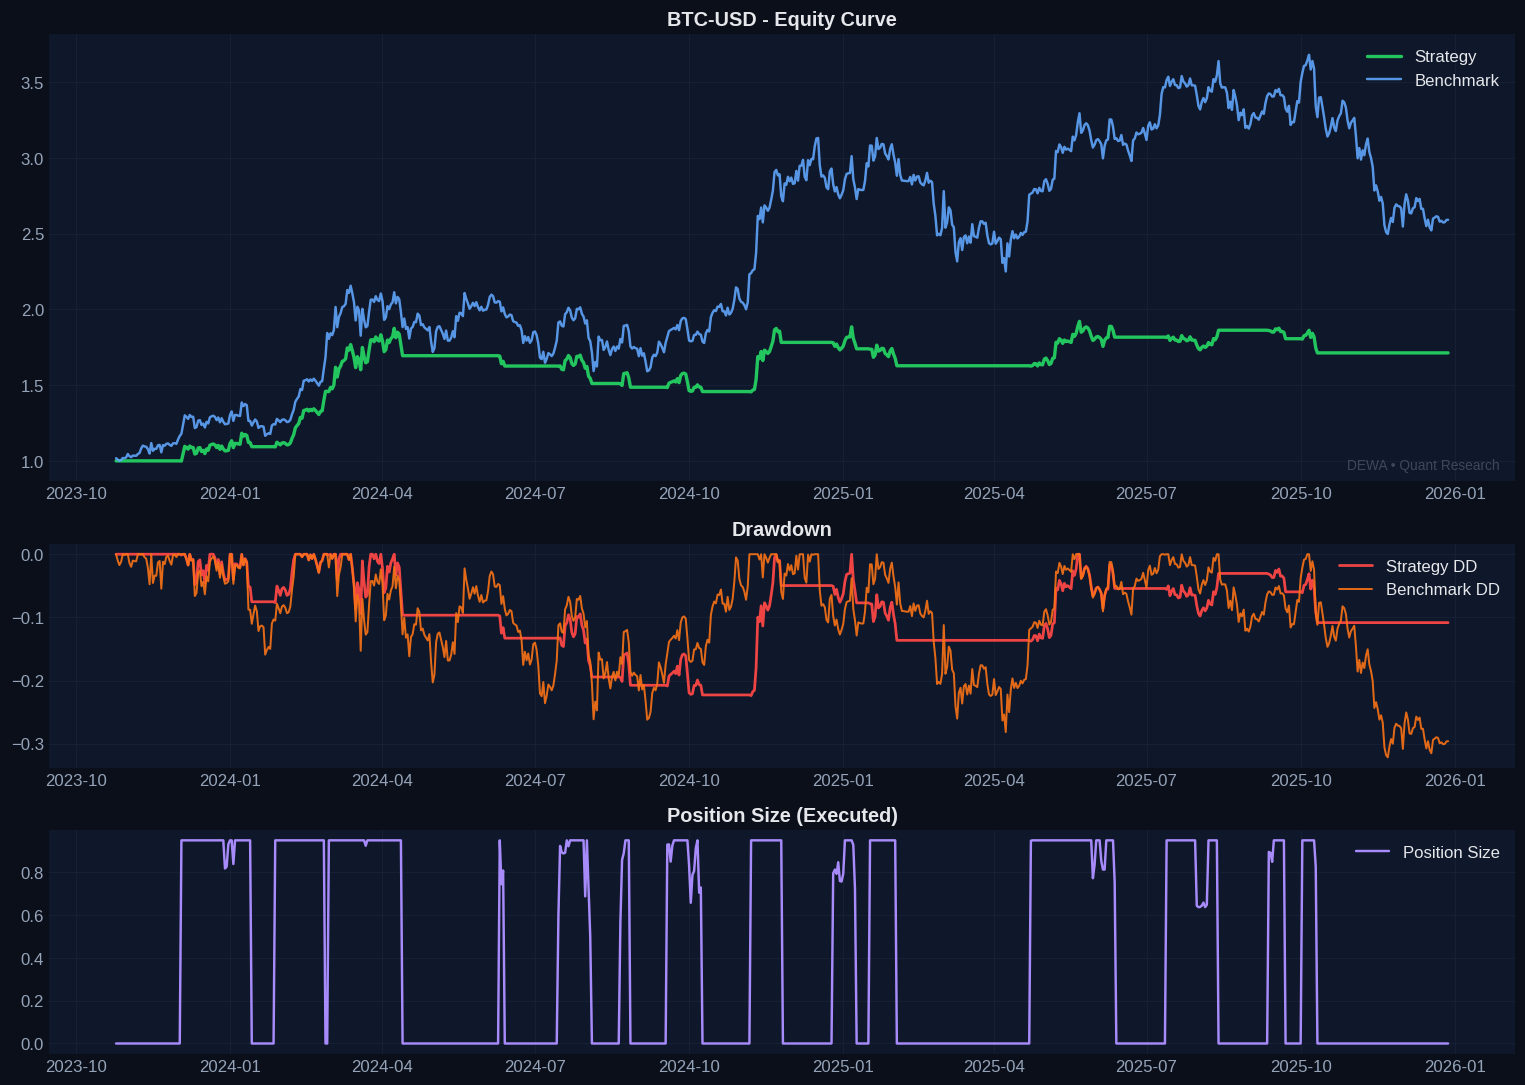

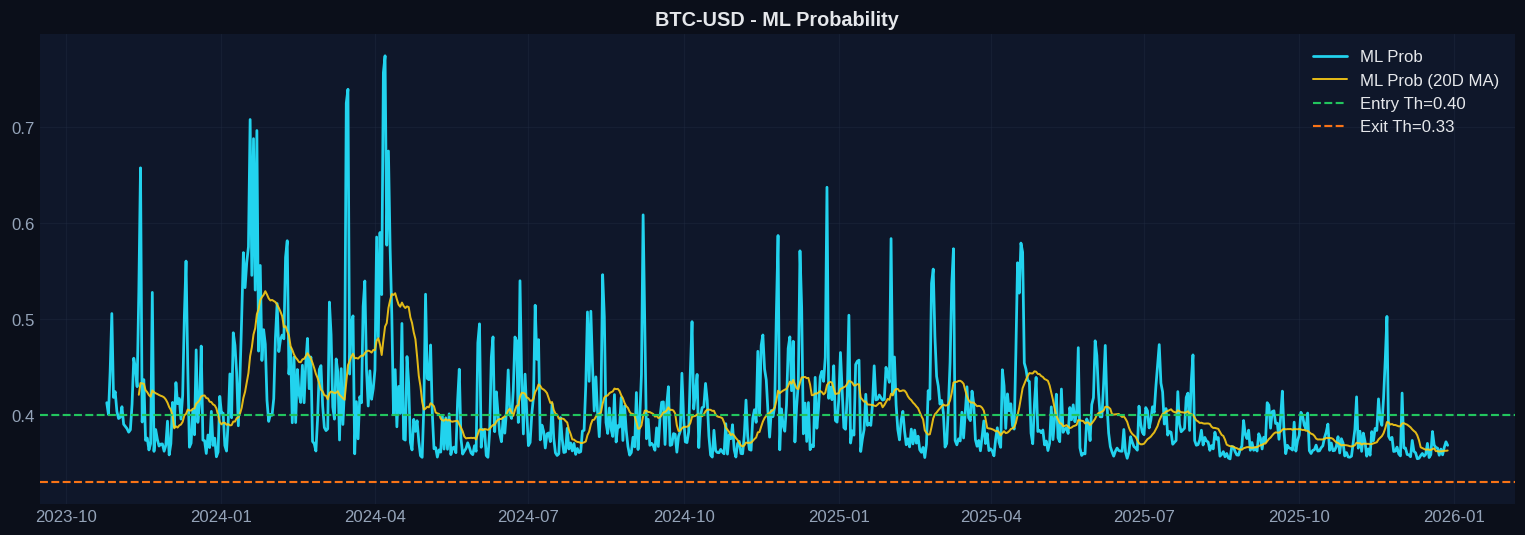

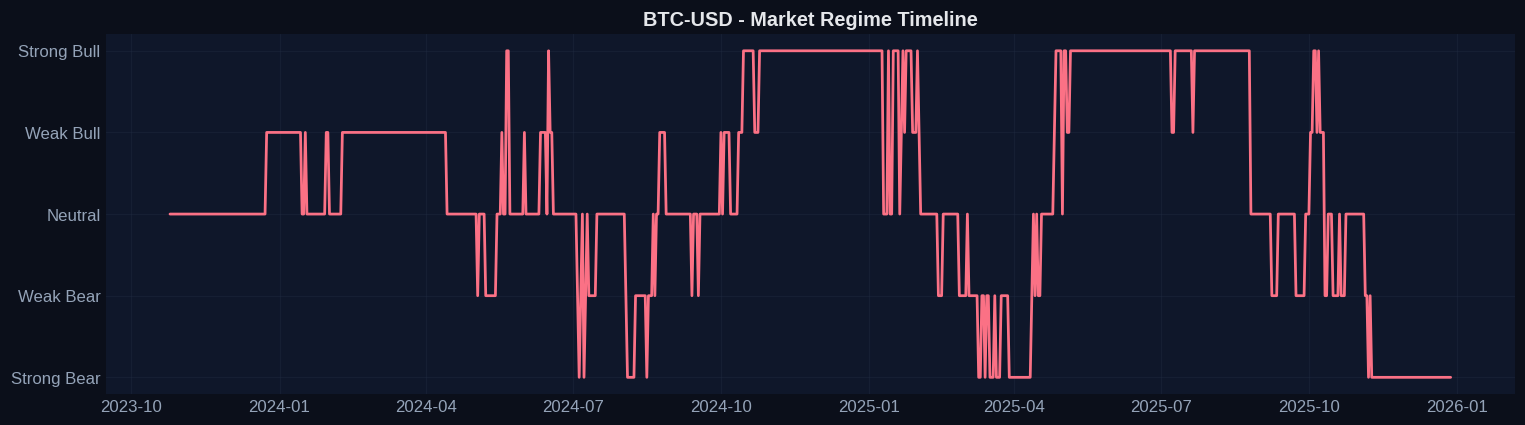

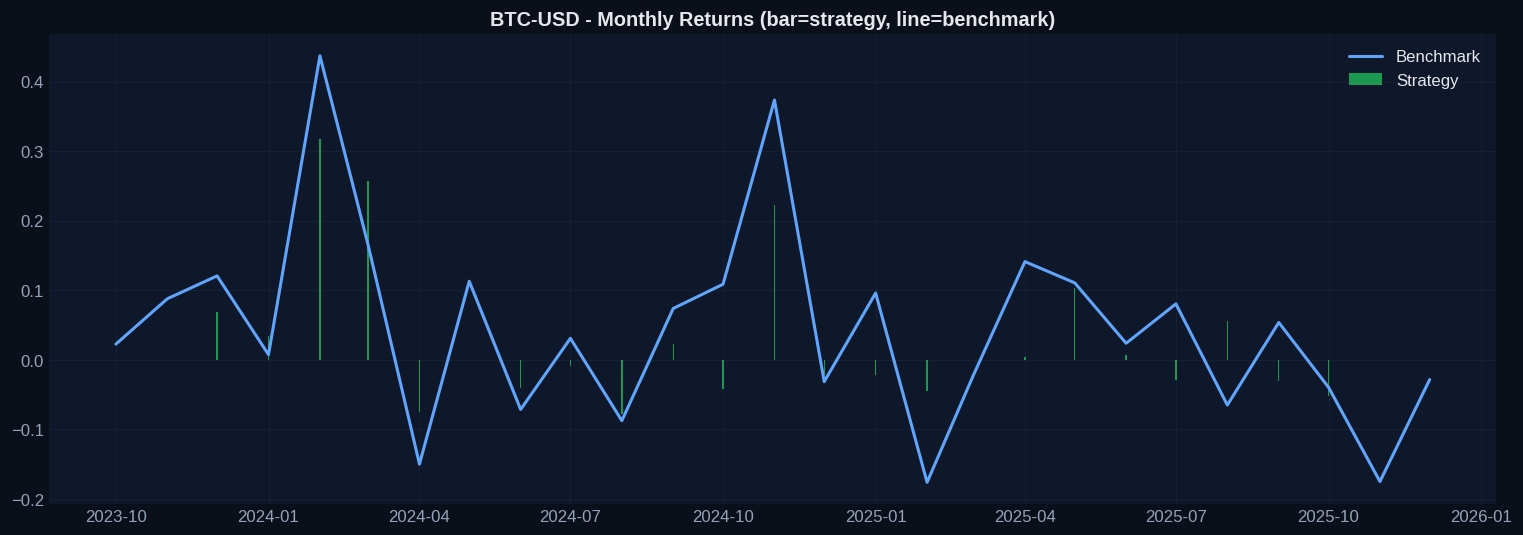

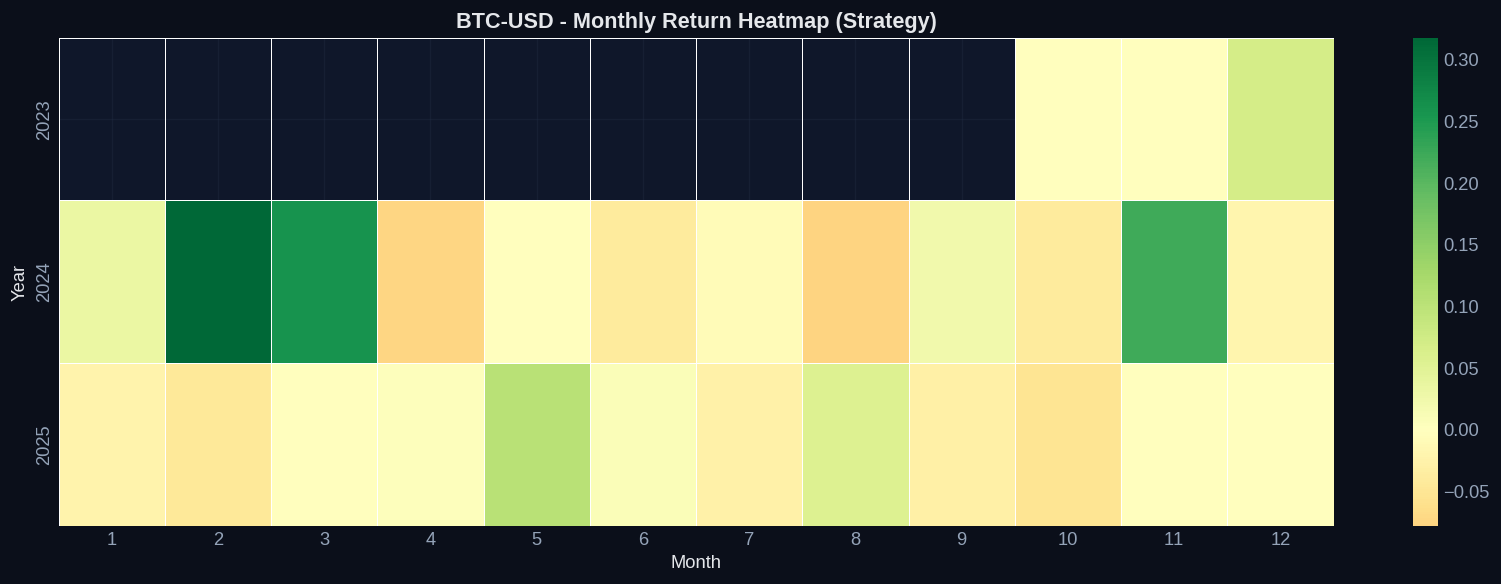

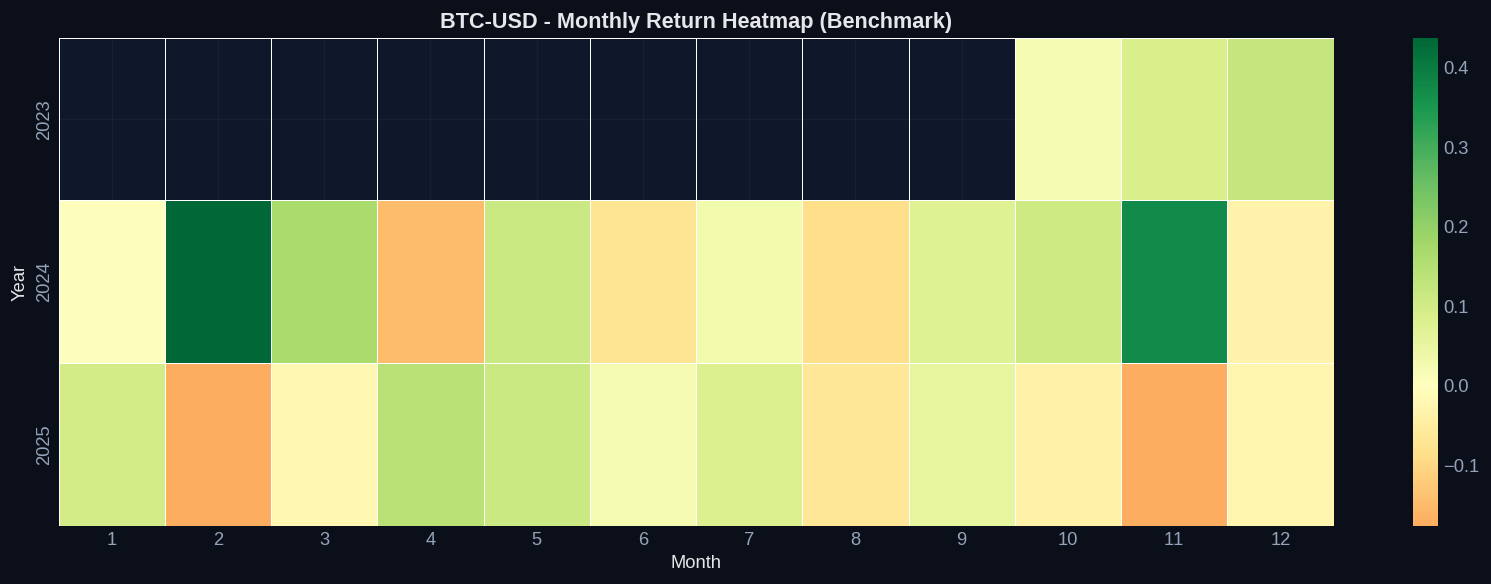

🖼️ Saved LinkedIn card: reports/linkedin/BTC-USD_V88_linkedin_20251229_1312.png
🖼️ Saved bonus card: reports/linkedin/BTC-USD_V88_bonus_20251229_1312.png

📊 Processing ETH-USD
------------------------------------------------------------
 📈 Total raw data: 2189 days
 🔄 WFV 1/5: Train=1194, Test=199 (2023-10-25 to 2024-05-10)


2025-12-29 13:12:41,916 | INFO | ETH-USD | ML validate precision_on_signals=0.312 | signals=32
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.312 | signals=32


 🔄 WFV 2/5: Train=1393, Test=199 (2024-05-11 to 2024-11-25)


2025-12-29 13:12:44,165 | INFO | ETH-USD | ML validate precision_on_signals=0.396 | signals=48
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.396 | signals=48


 🔄 WFV 3/5: Train=1592, Test=199 (2024-11-26 to 2025-06-12)


2025-12-29 13:12:46,489 | INFO | ETH-USD | ML validate precision_on_signals=0.366 | signals=41
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.366 | signals=41


 🔄 WFV 4/5: Train=1791, Test=199 (2025-06-13 to 2025-12-28)


2025-12-29 13:12:48,917 | INFO | ETH-USD | ML validate precision_on_signals=0.314 | signals=51
INFO:profit_maximizer_v88:ETH-USD | ML validate precision_on_signals=0.314 | signals=51


 📊 ETH-USD:
   Return: +167.92% vs B&H: +65.24% (+102.68%)
   Sharpe: 1.23 | Sortino: 1.62
   Win Rate: 22.4% | Profit Factor: 1.38
   Max DD: -19.22% | Exposure: 42.0%
   Avg Position: 87.5%


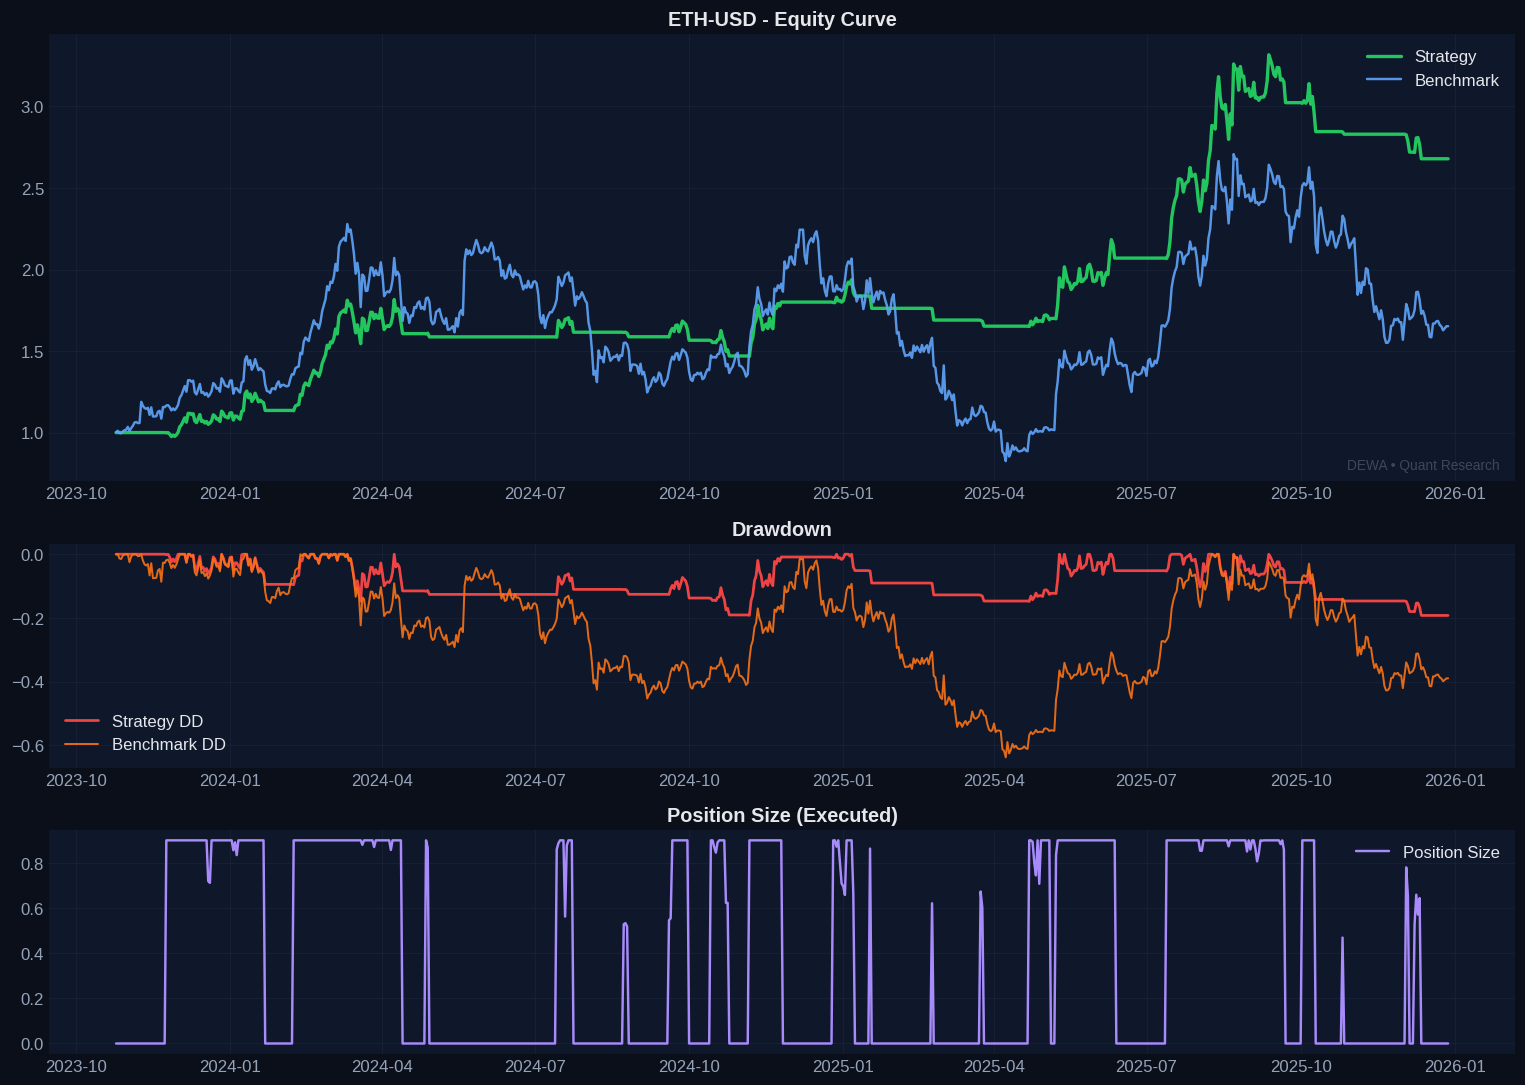

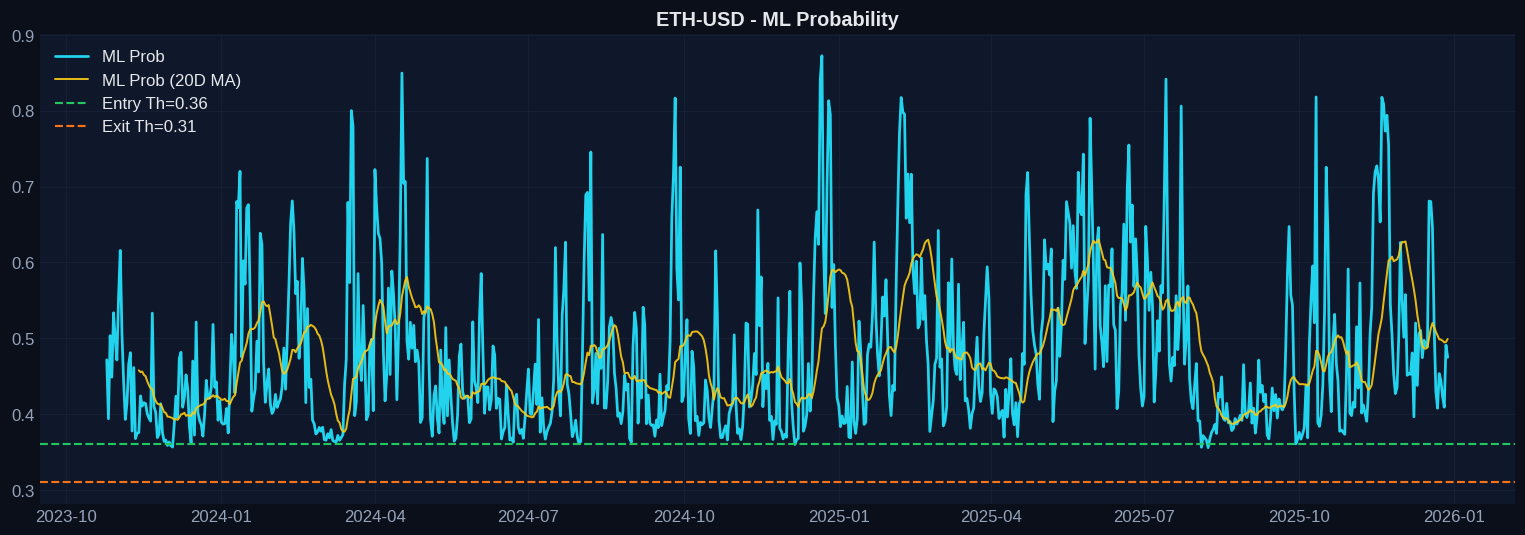

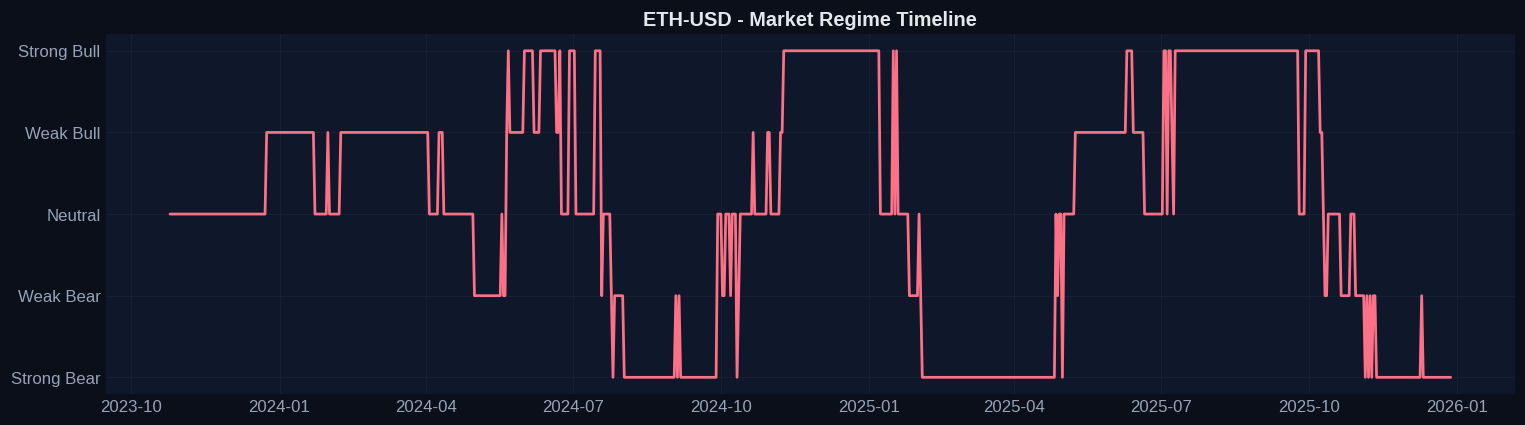

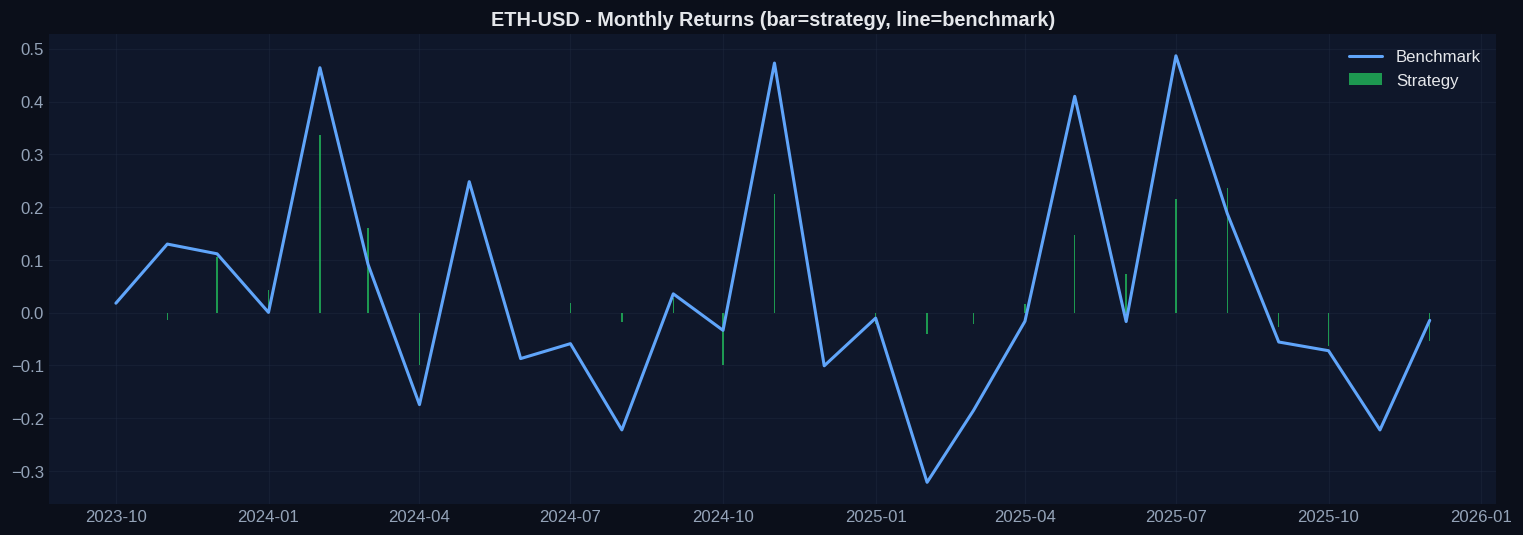

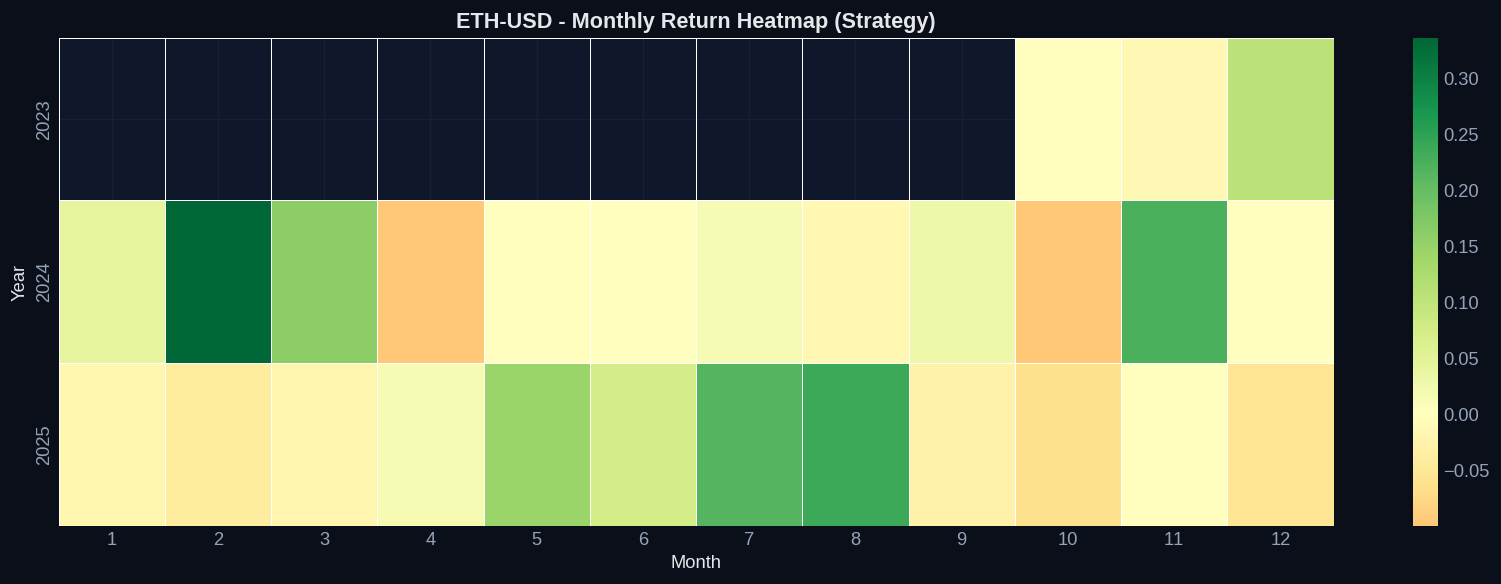

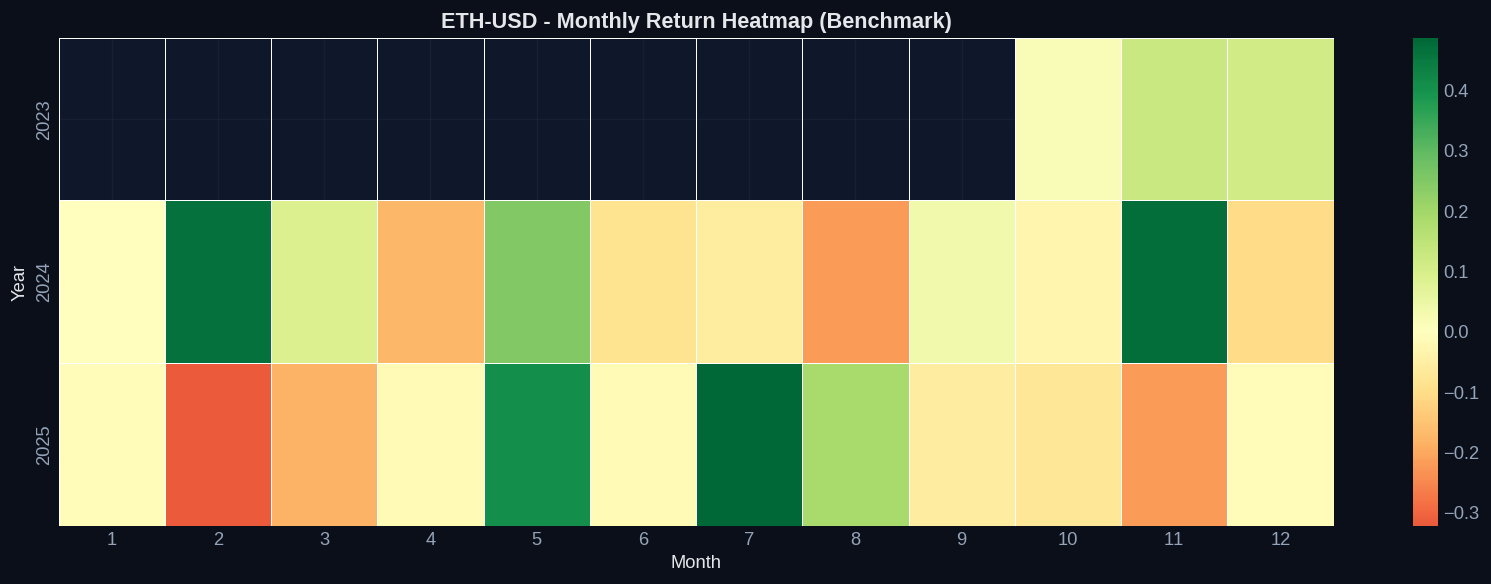

🖼️ Saved LinkedIn card: reports/linkedin/ETH-USD_V88_linkedin_20251229_1312.png
🖼️ Saved bonus card: reports/linkedin/ETH-USD_V88_bonus_20251229_1312.png

🏆 COMPREHENSIVE REPORT - V8.8 (PROFIT MAXIMIZER)

📈 PORTFOLIO:
   Total Return: +119.42%
   Benchmark: +117.30%
   🎯 Outperformance: +2.11%
   Sharpe: 1.24 | Sortino: 1.56
   Max DD: -20.49% | Win Rate: 25.9%

💼 ASSETS:
   BTC-USD: +71.26% vs B&H +159.09% (-87.83%)
   ETH-USD: +167.92% vs B&H +65.24% (+102.68%)

✅ PHASE 4 V8.8 COMPLETED


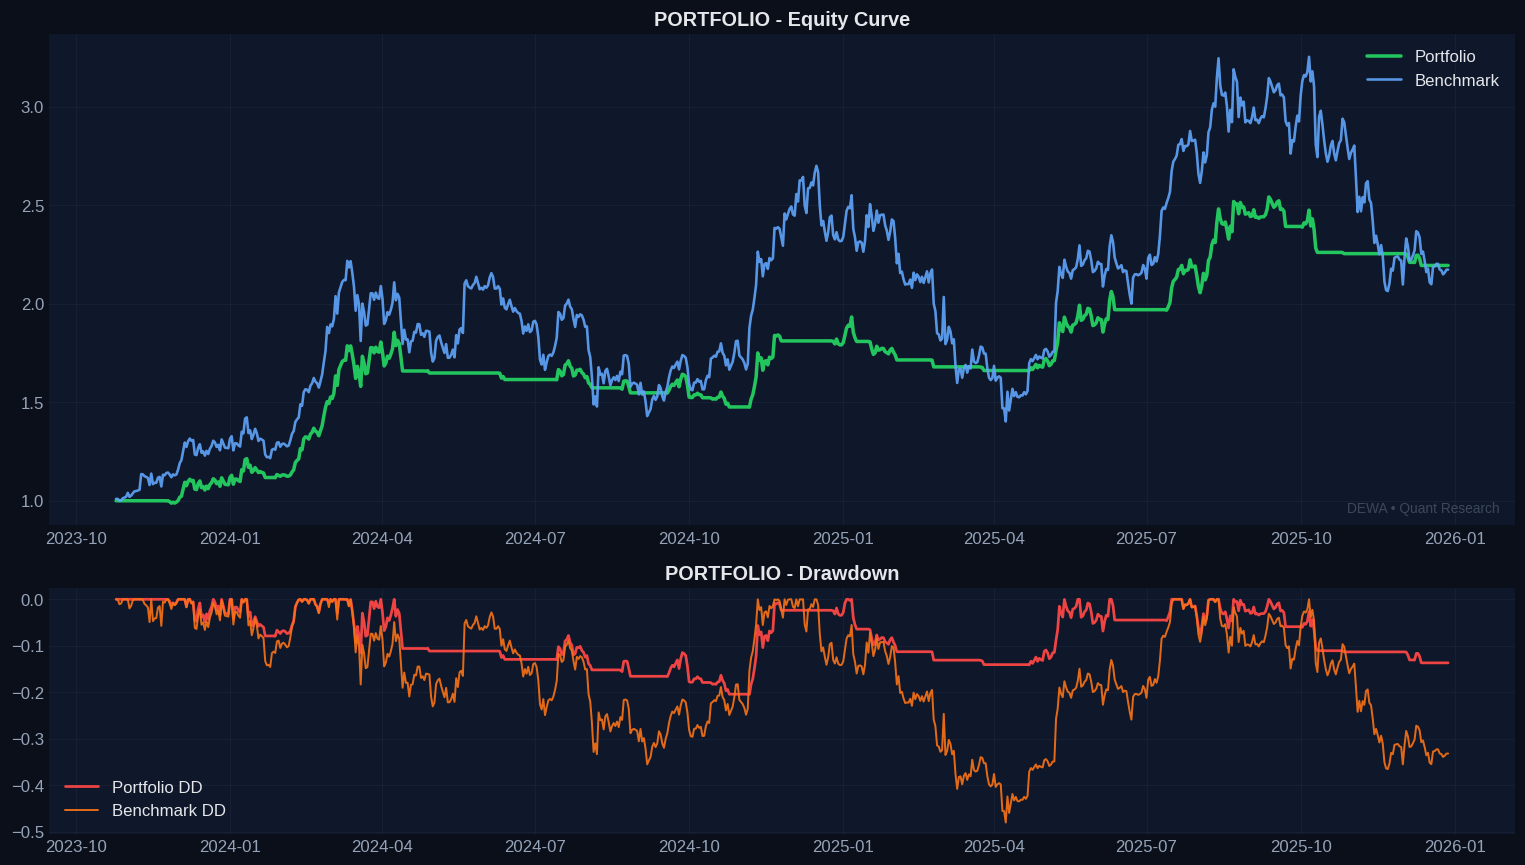

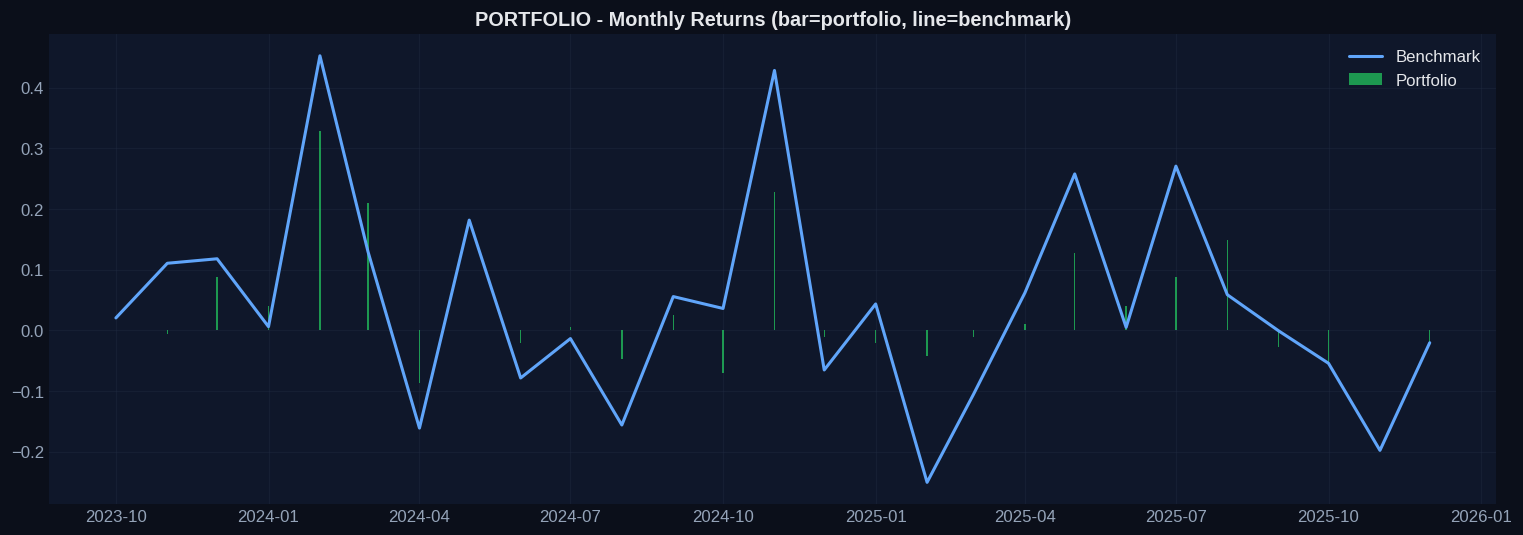

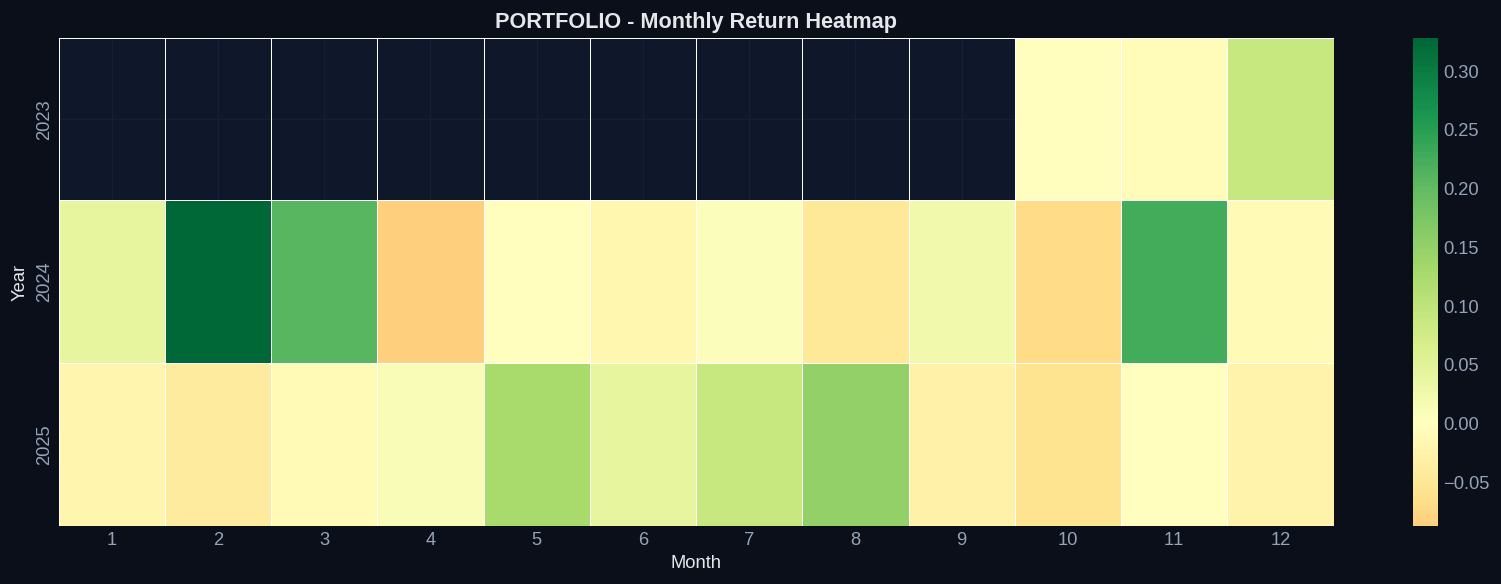

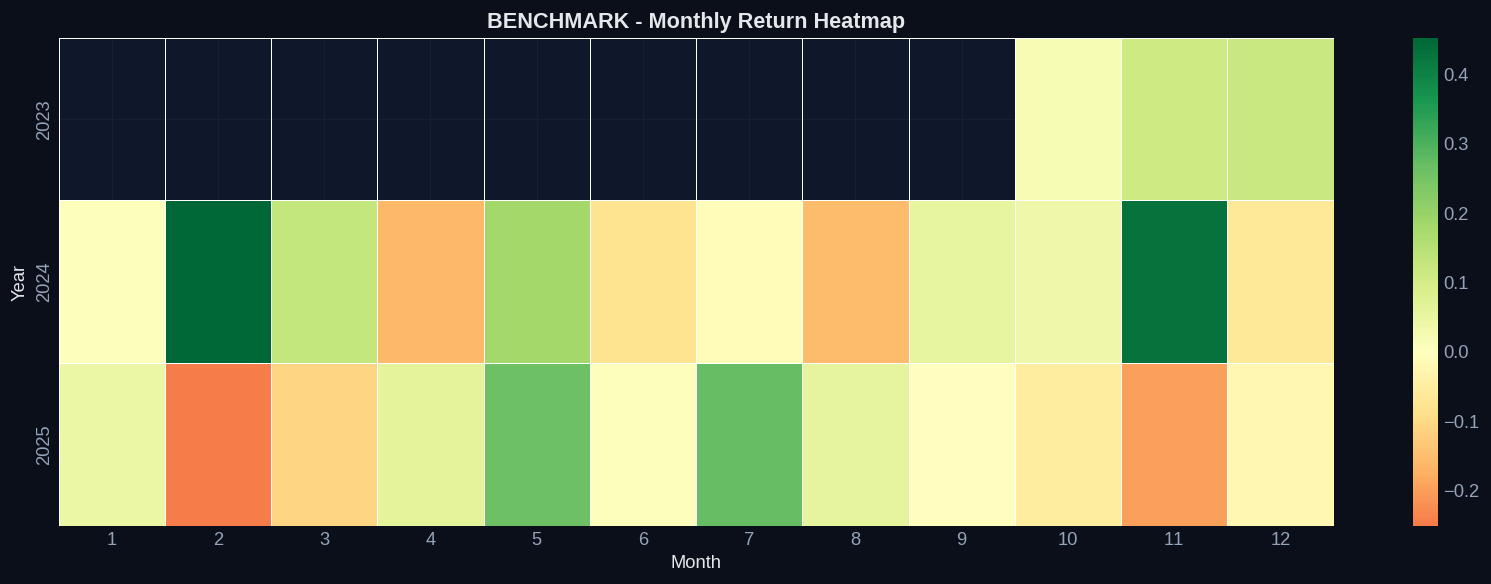

🖼️ Saved portfolio LinkedIn card: reports/linkedin/PORTFOLIO_V88_linkedin_20251229_1312.png


In [9]:
# ============================================================================
# 🚀 ML TRADING SYSTEM - PHASE 4: PROFIT MAXIMIZER V8.8 (FULL + LINKEDIN VISUAL PACK)
# Author: DEWA
# Date: December 2025
# Status: GitHub-ready, colorful report visuals (PNG export for LinkedIn)
# ============================================================================
from __future__ import annotations

import os
import warnings
import logging
from dataclasses import dataclass
from datetime import datetime
from typing import Dict, List, Tuple, Optional

import numpy as np
import pandas as pd
import yfinance as yf
import xgboost as xgb
import talib as ta

from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Optional heatmap (only used in monthly heatmap)
try:
    import seaborn as sns  # type: ignore
    _HAS_SEABORN = True
except Exception:
    _HAS_SEABORN = False

warnings.filterwarnings("ignore")

# =============================================================================
# LOGGING
# =============================================================================
def setup_logger(level: int = logging.INFO) -> logging.Logger:
    logger = logging.getLogger("profit_maximizer_v88")
    if logger.handlers:
        return logger
    logger.setLevel(level)
    h = logging.StreamHandler()
    fmt = logging.Formatter("%(asctime)s | %(levelname)s | %(message)s")
    h.setFormatter(fmt)
    logger.addHandler(h)
    return logger

log = setup_logger(logging.INFO)

# =============================================================================
# LINKEDIN THEME (COLORFUL + CONSISTENT)
# =============================================================================
@dataclass
class VisualTheme:
    fig_bg: str = "#0b0f1a"
    ax_bg: str = "#0f172a"
    grid: str = "#243045"
    text: str = "#e5e7eb"
    muted: str = "#94a3b8"

    green: str = "#22c55e"
    blue: str = "#60a5fa"
    orange: str = "#f97316"
    purple: str = "#a78bfa"
    red: str = "#ef4444"
    cyan: str = "#22d3ee"
    pink: str = "#fb7185"
    yellow: str = "#facc15"

THEME = VisualTheme()

def apply_linkedin_theme() -> None:
    plt.rcParams.update({
        "figure.facecolor": THEME.fig_bg,
        "axes.facecolor": THEME.ax_bg,
        "axes.edgecolor": THEME.grid,
        "axes.labelcolor": THEME.text,
        "xtick.color": THEME.muted,
        "ytick.color": THEME.muted,
        "text.color": THEME.text,
        "grid.color": THEME.grid,
        "grid.alpha": 0.35,
        "axes.grid": True,
        "font.size": 11,
        "axes.titleweight": "bold",
        "axes.titlesize": 13,
        "legend.frameon": False,
        "savefig.facecolor": THEME.fig_bg,
        "savefig.edgecolor": THEME.fig_bg,
    })

apply_linkedin_theme()

# =============================================================================
# UTILITIES
# =============================================================================
def ensure_dir(path: str) -> None:
    os.makedirs(path, exist_ok=True)

def fmt_pct(x: float, digits: int = 1) -> str:
    return f"{x * 100:.{digits}f}%"

def compute_equity_curve(returns: pd.Series, start_value: float = 1.0) -> pd.Series:
    if returns.empty:
        return pd.Series(dtype=float)
    return start_value * (1.0 + returns.fillna(0.0)).cumprod()

def compute_drawdown(equity: pd.Series) -> pd.Series:
    if equity.empty:
        return pd.Series(dtype=float)
    rm = equity.cummax()
    return (equity - rm) / rm

def to_monthly_returns(daily_returns: pd.Series) -> pd.Series:
    if daily_returns.empty:
        return pd.Series(dtype=float)
    m = (1.0 + daily_returns.fillna(0.0)).groupby(pd.Grouper(freq="M")).prod() - 1.0
    m.index = m.index.to_period("M").to_timestamp()
    return m

def rolling_sharpe(daily_returns: pd.Series, window: int = 90) -> pd.Series:
    if daily_returns.empty:
        return pd.Series(dtype=float)
    mu = daily_returns.rolling(window).mean()
    sd = daily_returns.rolling(window).std()
    rs = (mu / sd) * np.sqrt(252)
    return rs.replace([np.inf, -np.inf], np.nan)

def rolling_vol(daily_returns: pd.Series, window: int = 30) -> pd.Series:
    if daily_returns.empty:
        return pd.Series(dtype=float)
    return daily_returns.rolling(window).std() * np.sqrt(252)

def safe_clip_series(s: pd.Series, low: float, high: float) -> pd.Series:
    return s.clip(lower=low, upper=high)

def monthly_heatmap(series: pd.Series, title: str) -> None:
    """
    Heatmap monthly returns: Year x Month.
    Uses seaborn if available; otherwise fallback to matplotlib imshow.
    """
    if series.empty:
        return

    df = series.copy()
    df.index = pd.to_datetime(df.index)

    heat = pd.DataFrame({"ret": df.values}, index=df.index)
    heat["Year"] = heat.index.year
    heat["Month"] = heat.index.month

    pivot = heat.pivot_table(index="Year", columns="Month", values="ret", aggfunc="mean").sort_index()
    pivot = pivot.reindex(columns=range(1, 13))

    plt.figure(figsize=(14, 5), dpi=120)
    if _HAS_SEABORN:
        sns.heatmap(
            pivot,
            annot=False,
            center=0.0,
            cmap="RdYlGn",
            linewidths=0.3,
            cbar=True
        )
    else:
        arr = pivot.values
        plt.imshow(arr, aspect="auto")
        plt.colorbar()
        plt.yticks(range(len(pivot.index)), pivot.index)
        plt.xticks(range(12), range(1, 13))
    plt.title(title)
    plt.xlabel("Month")
    plt.ylabel("Year")
    plt.tight_layout()
    plt.show()

def save_fig(fig: plt.Figure, path: str) -> None:
    ensure_dir(os.path.dirname(path))
    fig.savefig(path, dpi=200, bbox_inches="tight", facecolor=THEME.fig_bg)
    plt.close(fig)

def add_watermark(ax, text: str = "DEWA • Quant Research", alpha: float = 0.35):
    ax.text(
        0.99, 0.02, text,
        transform=ax.transAxes,
        ha="right", va="bottom",
        fontsize=9,
        color=THEME.muted,
        alpha=alpha
    )

# =============================================================================
# 1. CONFIG V8.8
# =============================================================================
class ConfigV88:
    ASSETS = ["BTC-USD", "ETH-USD"]

    ASSET_PARAMS: Dict[str, Dict[str, float]] = {
        "BTC-USD": {
            "base_position": 0.80,
            "max_position": 0.95,
            "min_position": 0.50,
            "entry_threshold": 0.38,
            "exit_threshold": 0.33,
            "stop_loss": 0.08,
            "take_profit": 0.30,
            "trailing_stop": 0.12,
            "volatility_mult": 1.0,
            "trend_mult": 1.5,
        },
        "ETH-USD": {
            "base_position": 0.75,
            "max_position": 0.90,
            "min_position": 0.40,
            "entry_threshold": 0.36,
            "exit_threshold": 0.31,
            "stop_loss": 0.09,
            "take_profit": 0.35,
            "trailing_stop": 0.15,
            "volatility_mult": 0.9,
            "trend_mult": 1.6,
        },
    }

    COMMISSION = 0.001
    SLIPPAGE = 0.0005

    XGB_PARAMS = {
        "n_estimators": 250,
        "max_depth": 7,
        "learning_rate": 0.04,
        "subsample": 0.85,
        "colsample_bytree": 0.85,
        "reg_alpha": 0.05,
        "reg_lambda": 0.8,
        "random_state": 42,
        "n_jobs": -1,
        "eval_metric": "logloss",
        "use_label_encoder": False,
    }

    MAX_PORTFOLIO_DRAWDOWN = 0.30
    MAX_DAILY_LOSS = 0.04

    WFV_TRAIN_SIZE = 0.6
    WFV_STEP_SIZE = 0.1
    WFV_WINDOWS = 5

    START_DATE = "2020-01-01"
    END_DATE = "2025-12-29"

# =============================================================================
# 2. ENHANCED ML ENGINE V8.8
# =============================================================================
class EnhancedMLEngineV88:
    def __init__(self, symbol: str):
        self.symbol = symbol
        self.model = xgb.XGBClassifier(**ConfigV88.XGB_PARAMS)
        self.scaler = StandardScaler()
        self.is_trained = False

    def prepare_features(self, df: pd.DataFrame) -> Tuple[pd.DataFrame, List[str]]:
        df = df.copy()

        df["RETURN"] = df["Close"].pct_change()
        df["LOG_RETURN"] = np.log(df["Close"] / df["Close"].shift(1))

        df["VOLATILITY_5"] = df["RETURN"].rolling(5).std()
        df["VOLATILITY_10"] = df["RETURN"].rolling(10).std()
        df["VOLATILITY_20"] = df["RETURN"].rolling(20).std()
        df["VOLATILITY_RATIO"] = df["VOLATILITY_5"] / df["VOLATILITY_20"]

        df["RSI"] = ta.RSI(df["Close"], timeperiod=14)
        df["RSI_7"] = ta.RSI(df["Close"], timeperiod=7)
        df["RSI_21"] = ta.RSI(df["Close"], timeperiod=21)
        df["RSI_SLOPE"] = df["RSI"].diff(3)

        df["MACD"], df["MACD_SIGNAL"], df["MACD_HIST"] = ta.MACD(df["Close"])
        df["MACD_HIST_SLOPE"] = df["MACD_HIST"].diff(2)

        df["EMA_5"] = ta.EMA(df["Close"], timeperiod=5)
        df["EMA_10"] = ta.EMA(df["Close"], timeperiod=10)
        df["EMA_20"] = ta.EMA(df["Close"], timeperiod=20)
        df["EMA_50"] = ta.EMA(df["Close"], timeperiod=50)
        df["EMA_200"] = ta.EMA(df["Close"], timeperiod=200)

        df["PRICE_EMA5_RATIO"] = df["Close"] / df["EMA_5"]
        df["PRICE_EMA20_RATIO"] = df["Close"] / df["EMA_20"]
        df["PRICE_EMA50_RATIO"] = df["Close"] / df["EMA_50"]

        df["VOLUME_SMA"] = df["Volume"].rolling(20).mean()
        df["VOLUME_RATIO"] = df["Volume"] / df["VOLUME_SMA"]
        df["VOLUME_TREND"] = df["VOLUME_SMA"].pct_change(5)

        df["ATR"] = ta.ATR(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["ATR_PCT"] = df["ATR"] / df["Close"]
        df["ATR_TREND"] = df["ATR"].pct_change(5)

        df["ADX"] = ta.ADX(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["DI_PLUS"] = ta.PLUS_DI(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["DI_MINUS"] = ta.MINUS_DI(df["High"], df["Low"], df["Close"], timeperiod=14)
        df["DI_DIFF"] = df["DI_PLUS"] - df["DI_MINUS"]

        df["HIGH_20"] = df["High"].rolling(20).max()
        df["LOW_20"] = df["Low"].rolling(20).min()
        df["PRICE_POSITION"] = (df["Close"] - df["LOW_20"]) / (df["HIGH_20"] - df["LOW_20"])

        df["BB_UPPER"], df["BB_MIDDLE"], df["BB_LOWER"] = ta.BBANDS(df["Close"])
        df["BB_WIDTH"] = (df["BB_UPPER"] - df["BB_LOWER"]) / df["BB_MIDDLE"]
        df["BB_POSITION"] = (df["Close"] - df["BB_LOWER"]) / (df["BB_UPPER"] - df["BB_LOWER"])

        df["TREND"] = self._calculate_enhanced_trend(df)

        df["MOM_5"] = ta.MOM(df["Close"], timeperiod=5)
        df["MOM_10"] = ta.MOM(df["Close"], timeperiod=10)
        df["ROC"] = ta.ROC(df["Close"], timeperiod=10)

        for lag in [1, 2, 3, 5]:
            df[f"RETURN_LAG_{lag}"] = df["RETURN"].shift(lag)
            df[f"RSI_LAG_{lag}"] = df["RSI"].shift(lag)
            df[f"VOLUME_RATIO_LAG_{lag}"] = df["VOLUME_RATIO"].shift(lag)

        # Target: next 3-day move > 2%
        df["TARGET"] = (df["Close"].shift(-3) > df["Close"] * 1.02).astype(int)

        features = [
            "RETURN","LOG_RETURN",
            "VOLATILITY_5","VOLATILITY_10","VOLATILITY_20","VOLATILITY_RATIO",
            "RSI","RSI_7","RSI_21","RSI_SLOPE",
            "MACD","MACD_HIST","MACD_HIST_SLOPE",
            "EMA_5","EMA_10","EMA_20","EMA_50","EMA_200",
            "PRICE_EMA5_RATIO","PRICE_EMA20_RATIO","PRICE_EMA50_RATIO",
            "VOLUME_RATIO","VOLUME_TREND",
            "ATR_PCT","ATR_TREND",
            "ADX","DI_DIFF",
            "PRICE_POSITION",
            "BB_WIDTH","BB_POSITION",
            "TREND",
            "MOM_5","MOM_10","ROC",
            "RETURN_LAG_1","RETURN_LAG_2","RETURN_LAG_3",
            "RSI_LAG_1","RSI_LAG_2","RSI_LAG_3",
            "VOLUME_RATIO_LAG_1","VOLUME_RATIO_LAG_2",
        ]
        available = [f for f in features if f in df.columns]
        df_clean = df.dropna(subset=available + ["TARGET", "Close"])
        return df_clean, available

    def _calculate_enhanced_trend(self, df: pd.DataFrame) -> pd.Series:
        close = df["Close"].values
        if len(close) < 200:
            return pd.Series(0.0, index=df.index)

        ema_20 = ta.EMA(close, timeperiod=20)
        ema_50 = ta.EMA(close, timeperiod=50)
        ema_200 = ta.EMA(close, timeperiod=200)

        trend = np.zeros(len(close), dtype=float)
        for i in range(len(close)):
            if i < 200:
                continue
            c = close[i]
            if c > ema_20[i] > ema_50[i] > ema_200[i]:
                trend[i] = 1.5
            elif c > ema_20[i] > ema_50[i]:
                trend[i] = 1.0
            elif c > ema_20[i]:
                trend[i] = 0.5
            elif c < ema_20[i] < ema_50[i] < ema_200[i]:
                trend[i] = -1.5
            elif c < ema_20[i] < ema_50[i]:
                trend[i] = -1.0
            elif c < ema_20[i]:
                trend[i] = -0.5
        return pd.Series(trend, index=df.index)

    def train(self, df: pd.DataFrame, features: List[str]) -> bool:
        if len(df) < 100:
            return False

        X = df[features].values
        y = df["TARGET"].values

        split = int(len(X) * 0.8)
        X_train, X_val = X[:split], X[split:]
        y_train, y_val = y[:split], y[split:]

        X_train_s = self.scaler.fit_transform(X_train)
        X_val_s = self.scaler.transform(X_val)

        self.model.fit(X_train_s, y_train, eval_set=[(X_val_s, y_val)], verbose=False)

        pred = self.model.predict(X_val_s)
        precision_on_signals = float(np.mean(y_val[pred == 1])) if np.sum(pred) > 0 else 0.0
        log.info(f"{self.symbol} | ML validate precision_on_signals={precision_on_signals:.3f} | signals={int(np.sum(pred))}")

        self.is_trained = True
        return True

    def predict(self, df: pd.DataFrame, features: List[str]) -> np.ndarray:
        if not self.is_trained or len(df) == 0:
            return np.full(len(df), 0.5)

        available = [f for f in features if f in df.columns]
        if not available:
            return np.full(len(df), 0.5)

        X = self.scaler.transform(df[available].values)
        proba = self.model.predict_proba(X)[:, 1]

        # calibrated range
        proba = 0.35 + 0.55 * proba  # [0.35, 0.90]
        return np.clip(proba, 0.30, 0.90)

# =============================================================================
# 3. STRATEGY V8.8 (STATEFUL POSITION + TRAILING)
# =============================================================================
class ProfitMaximizedStrategy:
    def __init__(self, symbol: str):
        self.symbol = symbol
        self.params = ConfigV88.ASSET_PARAMS[symbol]
        self.pos_open = False
        self.entry_price = 0.0
        self.peak_price = 0.0
        self.last_strength = 0.0

    def generate_signals(self, df: pd.DataFrame, ml_probs: np.ndarray) -> Tuple[pd.Series, pd.Series]:
        n = len(df)
        signals = pd.Series(0, index=df.index, dtype=int)
        strengths = pd.Series(0.0, index=df.index, dtype=float)

        if n < 30:
            return signals, strengths

        close = df["Close"].values
        rsi = df["RSI"].values if "RSI" in df.columns else np.full(n, 50.0)
        adx = df["ADX"].values if "ADX" in df.columns else np.full(n, 25.0)
        volume_ratio = df["VOLUME_RATIO"].values if "VOLUME_RATIO" in df.columns else np.ones(n)

        ema_20 = df["EMA_20"].values if "EMA_20" in df.columns else close
        ema_50 = df["EMA_50"].values if "EMA_50" in df.columns else close
        trend = df["TREND"].values if "TREND" in df.columns else np.zeros(n)

        for i in range(30, n):
            price = float(close[i])

            # ---- Position management ----
            if self.pos_open:
                profit_pct = (price - self.entry_price) / self.entry_price
                self.peak_price = max(self.peak_price, price)
                dd_from_peak = (price - self.peak_price) / self.peak_price

                # trailing active after +10%
                if profit_pct > 0.10 and dd_from_peak < -self.params["trailing_stop"]:
                    self._close()
                elif profit_pct > self.params["take_profit"]:
                    self._close()
                elif profit_pct < -self.params["stop_loss"]:
                    self._close()

            # ---- Entry ----
            if not self.pos_open:
                ml_ok = float(ml_probs[i]) > self.params["entry_threshold"]
                trend_ok = (price > float(ema_20[i])) or (float(trend[i]) >= 0.5)
                rsi_ok = 25.0 < float(rsi[i]) < 85.0
                vol_ok = float(volume_ratio[i]) > 0.5
                adx_ok = float(adx[i]) > 15.0

                momentum_ok = True
                if "MOM_10" in df.columns:
                    momentum_ok = float(df["MOM_10"].iloc[i]) > 0.0

                if ml_ok and trend_ok and rsi_ok and vol_ok and adx_ok and momentum_ok:
                    self._open(price)
                    strength = self._calc_strength(
                        ml_prob=float(ml_probs[i]),
                        trend=float(trend[i]),
                        price=price,
                        ema_20=float(ema_20[i]),
                        volume_ratio=float(volume_ratio[i]),
                        adx=float(adx[i]),
                        rsi=float(rsi[i]),
                    )
                    self.last_strength = strength

            # ---- Soft exit ----
            if self.pos_open:
                exit_conditions = [
                    float(ml_probs[i]) < self.params["exit_threshold"],
                    float(trend[i]) < -0.5,
                    float(rsi[i]) < 30.0,
                    (price < float(ema_50[i]) and float(adx[i]) < 20.0),
                ]
                if any(exit_conditions):
                    self._close()

            signals.iloc[i] = 1 if self.pos_open else 0
            strengths.iloc[i] = self.last_strength if self.pos_open else 0.0

        return signals, strengths

    def _open(self, price: float) -> None:
        self.pos_open = True
        self.entry_price = price
        self.peak_price = price

    def _close(self) -> None:
        self.pos_open = False
        self.entry_price = 0.0
        self.peak_price = 0.0
        self.last_strength = 0.0

    @staticmethod
    def _calc_strength(
        ml_prob: float,
        trend: float,
        price: float,
        ema_20: float,
        volume_ratio: float,
        adx: float,
        rsi: float,
    ) -> float:
        strength = 0.0

        ml_strength = (ml_prob - 0.35) / 0.55
        strength += 0.40 * float(np.clip(ml_strength, 0.0, 1.0))

        if trend >= 1.0:
            strength += 0.30
        elif trend >= 0.5:
            strength += 0.20
        elif price > ema_20:
            strength += 0.10

        if volume_ratio > 1.5:
            strength += 0.15
        elif volume_ratio > 1.0:
            strength += 0.10
        elif volume_ratio > 0.7:
            strength += 0.05

        if adx > 30:
            strength += 0.10
        elif adx > 20:
            strength += 0.05

        if 45 < rsi < 65:
            strength += 0.05

        return float(np.clip(strength, 0.2, 1.0))

# =============================================================================
# 4. POSITION SIZER V8.8
# =============================================================================
class EnhancedPositionSizer:
    def calculate_position(
        self,
        asset: str,
        signal_strength: float,
        ml_prob: float,
        volatility: float,
        trend: float,
        market_regime: str,
    ) -> float:
        p = ConfigV88.ASSET_PARAMS[asset]
        base = float(p["base_position"])

        base *= float(0.6 + 0.6 * signal_strength)

        ml_adj = 0.8 + 0.8 * (ml_prob - 0.4) * 2.0
        base *= float(np.clip(ml_adj, 0.7, 1.5))

        vol_adj = float(p["volatility_mult"]) / max(float(volatility), 0.01)
        base *= float(np.clip(vol_adj, 0.7, 1.3))

        if trend > 1.0:
            base *= float(1.0 + p["trend_mult"] * 0.8)
        elif trend > 0.5:
            base *= float(1.0 + p["trend_mult"] * 0.5)
        elif trend > 0.0:
            base *= float(1.0 + p["trend_mult"] * 0.2)

        regime_mult = {
            "strong_bull": 1.4,
            "weak_bull": 1.2,
            "neutral": 1.0,
            "weak_bear": 0.6,
            "strong_bear": 0.4,
        }.get(market_regime, 1.0)
        base *= float(regime_mult)

        return float(np.clip(base, p["min_position"], p["max_position"]))

# =============================================================================
# 5. MARKET REGIME DETECTOR
# =============================================================================
class MarketRegimeDetector:
    def __init__(self, lookback_days: int = 60):
        self.lookback = lookback_days

    def detect_regime(self, df: pd.DataFrame, current_idx: int) -> str:
        if current_idx < self.lookback:
            return "neutral"

        start_idx = max(0, current_idx - self.lookback)
        recent = df.iloc[start_idx:current_idx]
        if len(recent) < 20:
            return "neutral"

        returns = recent["Close"].pct_change().dropna()
        if len(returns) < 10:
            return "neutral"

        avg_return = float(returns.mean() * 252)
        vol = float(returns.std() * np.sqrt(252))
        sharpe = avg_return / vol if vol > 0 else 0.0

        current_price = float(df["Close"].iloc[current_idx - 1])
        sma_50 = float(df["Close"].rolling(50).mean().iloc[current_idx - 1])
        sma_200 = float(df["Close"].rolling(200).mean().iloc[current_idx - 1])

        if current_price > sma_200 and sharpe > 1.0:
            return "strong_bull"
        if current_price > sma_50 and sharpe > 0.5:
            return "weak_bull"
        if current_price < sma_200 and sharpe < -1.0:
            return "strong_bear"
        if current_price < sma_50 and sharpe < -0.5:
            return "weak_bear"
        return "neutral"

# =============================================================================
# 6. MAIN SYSTEM V8.8 + LINKEDIN EXPORT
# =============================================================================
class ProfitMaximizedSystemV88:
    def __init__(self):
        self.config = ConfigV88()
        self.ml_engines: Dict[str, EnhancedMLEngineV88] = {}
        self.strategies: Dict[str, ProfitMaximizedStrategy] = {}
        self.position_sizer = EnhancedPositionSizer()
        self.regime_detector = MarketRegimeDetector()
        self.results: Dict[str, Dict[str, object]] = {}

    def run(self, make_plots: bool = True, export_linkedin: bool = True, out_dir: str = "reports/linkedin"):
        print("\n" + "=" * 80)
        print("🚀 ML TRADING SYSTEM - PHASE 4 V8.8 (PROFIT MAXIMIZER + LINKEDIN VISUAL PACK)")
        print("=" * 80)

        for symbol in self.config.ASSETS:
            print(f"\n📊 Processing {symbol}")
            print("-" * 60)

            self.ml_engines[symbol] = EnhancedMLEngineV88(symbol)
            self.strategies[symbol] = ProfitMaximizedStrategy(symbol)

            df = self.fetch_data(symbol)
            if df.empty:
                print("❌ Empty data, skip.")
                continue

            print(f" 📈 Total raw data: {len(df)} days")
            df_clean, features = self.ml_engines[symbol].prepare_features(df)

            if len(df_clean) < 500:
                print(f" ❌ Insufficient clean data: {len(df_clean)}")
                continue

            total_windows = self.config.WFV_WINDOWS
            train_frac = self.config.WFV_TRAIN_SIZE
            step_size = int(len(df_clean) * self.config.WFV_STEP_SIZE)

            all_signals = []
            all_strengths = []
            all_positions = []
            all_returns = []
            all_ml_probs = []

            for w in range(total_windows):
                train_end = int(len(df_clean) * (train_frac + w * self.config.WFV_STEP_SIZE))
                test_start = train_end
                test_end = min(test_start + step_size, len(df_clean))

                if test_end - test_start < 30:
                    break

                train_df = df_clean.iloc[:train_end]
                test_df = df_clean.iloc[test_start:test_end]

                print(
                    f" 🔄 WFV {w+1}/{total_windows}: Train={len(train_df)}, Test={len(test_df)} "
                    f"({test_df.index[0].date()} to {test_df.index[-1].date()})"
                )

                trained = self.ml_engines[symbol].train(train_df, features)
                ml_probs = self.ml_engines[symbol].predict(test_df, features) if trained else np.full(len(test_df), 0.6)

                signals, strengths = self.strategies[symbol].generate_signals(test_df, ml_probs)
                positions = self.calculate_positions(symbol, test_df, signals, strengths, ml_probs)
                returns = self.calculate_returns(test_df, positions)

                all_signals.append(signals)
                all_strengths.append(strengths)
                all_positions.append(positions)
                all_returns.append(returns)
                all_ml_probs.append(pd.Series(ml_probs, index=test_df.index))

            if not all_returns:
                print(" ❌ No valid results.")
                continue

            sig = pd.concat(all_signals).sort_index()
            stg = pd.concat(all_strengths).sort_index()
            pos = pd.concat(all_positions).sort_index()
            ret = pd.concat(all_returns).sort_index()
            probs = pd.concat(all_ml_probs).sort_index()

            bench = df_clean["Close"].pct_change().fillna(0).reindex(ret.index)
            test_data = df_clean.reindex(ret.index)

            self.results[symbol] = {
                "returns": ret,
                "signals": sig,
                "positions": pos,
                "strengths": stg,
                "ml_probs": probs,
                "benchmark": bench,
                "test_data": test_data,
            }

            self.print_metrics(symbol)

            if make_plots:
                self.plot_asset_visuals(symbol)

            if export_linkedin:
                self.export_linkedin_card(symbol, out_dir=out_dir)

        if self.results:
            self.generate_comprehensive_report()
            if make_plots:
                self.plot_portfolio_visuals()
            if export_linkedin:
                self.export_portfolio_linkedin_card(out_dir=out_dir)
        else:
            print("\n❌ No results generated")

    # -----------------------------
    # Data fetch
    # -----------------------------
    def fetch_data(self, symbol: str) -> pd.DataFrame:
        try:
            df = yf.download(
                symbol,
                start=self.config.START_DATE,
                end=self.config.END_DATE,
                interval="1d",
                progress=False,
                auto_adjust=True,
            )

            if df is None or df.empty:
                return pd.DataFrame()

            if isinstance(df.columns, pd.MultiIndex):
                df.columns = df.columns.get_level_values(0)

            required = ["Open", "High", "Low", "Close", "Volume"]
            for c in required:
                if c not in df.columns:
                    df[c] = np.nan

            df = df[required].astype(float).dropna()
            df.index = pd.to_datetime(df.index)
            return df
        except Exception as e:
            print(f"❌ Error fetch_data: {e}")
            return pd.DataFrame()

    # -----------------------------
    # Positions / Returns
    # -----------------------------
    def calculate_positions(
        self,
        symbol: str,
        df: pd.DataFrame,
        signals: pd.Series,
        strengths: pd.Series,
        ml_probs: np.ndarray,
    ) -> pd.Series:
        positions = pd.Series(0.0, index=df.index)

        vol = df["ATR_PCT"].values if "ATR_PCT" in df.columns else np.full(len(df), 0.02)
        trd = df["TREND"].values if "TREND" in df.columns else np.zeros(len(df))

        for i in range(len(df)):
            if int(signals.iloc[i]) == 1:
                regime = self.regime_detector.detect_regime(df, i)
                positions.iloc[i] = self.position_sizer.calculate_position(
                    asset=symbol,
                    signal_strength=float(strengths.iloc[i]),
                    ml_prob=float(ml_probs[i]),
                    volatility=float(vol[i]) if i < len(vol) else 0.02,
                    trend=float(trd[i]) if i < len(trd) else 0.0,
                    market_regime=regime,
                )

        return positions

    def calculate_returns(self, df: pd.DataFrame, positions: pd.Series) -> pd.Series:
        if "Close" not in df.columns:
            return pd.Series(dtype=float)

        asset_returns = df["Close"].pct_change().fillna(0.0)

        pos_exec = positions.shift(1).fillna(0.0)
        gross = pos_exec * asset_returns

        changes = positions.diff().abs().fillna(0.0)
        costs = changes * (self.config.COMMISSION + self.config.SLIPPAGE)

        net = gross - costs
        net = net.clip(lower=-self.config.MAX_DAILY_LOSS)
        return net.fillna(0.0)

    # -----------------------------
    # Metrics
    # -----------------------------
    def _metrics(self, returns: pd.Series, bench: pd.Series) -> Dict[str, float]:
        returns = returns.fillna(0.0)
        bench = bench.fillna(0.0)

        total_return = float((1 + returns).prod() - 1)
        bench_return = float((1 + bench).prod() - 1)
        outperf = total_return - bench_return

        std = float(returns.std())
        sharpe = float(returns.mean() / std * np.sqrt(252)) if std > 0 else 0.0

        downside = returns[returns < 0]
        downside_std = float(downside.std()) if len(downside) > 0 else 0.0
        sortino = float(returns.mean() / downside_std * np.sqrt(252)) if downside_std > 0 else 0.0

        equity = compute_equity_curve(returns)
        dd = compute_drawdown(equity)
        max_dd = float(dd.min())

        win_rate = float((returns > 0).mean() * 100.0)

        wins = float(returns[returns > 0].sum())
        losses = float(returns[returns < 0].sum())
        profit_factor = float(abs(wins / losses)) if losses != 0 else float("inf")

        return {
            "total_return": total_return,
            "bench_return": bench_return,
            "outperf": outperf,
            "sharpe": sharpe,
            "sortino": sortino,
            "max_dd": max_dd,
            "win_rate": win_rate,
            "profit_factor": profit_factor,
        }

    def print_metrics(self, symbol: str):
        res = self.results[symbol]
        returns = res["returns"]
        bench = res["benchmark"]
        signals = res["signals"]
        positions = res["positions"]

        m = self._metrics(returns, bench)

        exposure = float(signals.mean() * 100.0)
        avg_pos = float(positions[positions > 0].mean()) if (positions > 0).any() else 0.0

        print(f" 📊 {symbol}:")
        print(f"   Return: {m['total_return']:+.2%} vs B&H: {m['bench_return']:+.2%} ({m['outperf']:+.2%})")
        print(f"   Sharpe: {m['sharpe']:.2f} | Sortino: {m['sortino']:.2f}")
        print(f"   Win Rate: {m['win_rate']:.1f}% | Profit Factor: {m['profit_factor']:.2f}")
        print(f"   Max DD: {m['max_dd']:.2%} | Exposure: {exposure:.1f}%")
        print(f"   Avg Position: {avg_pos:.1%}")

    def generate_comprehensive_report(self):
        print("\n" + "=" * 80)
        print("🏆 COMPREHENSIVE REPORT - V8.8 (PROFIT MAXIMIZER)")
        print("=" * 80)

        rets = []
        benches = []
        for _, res in self.results.items():
            rets.append(res["returns"])
            benches.append(res["benchmark"])

        portfolio = pd.concat(rets, axis=1).mean(axis=1).sort_index()
        bench = pd.concat(benches, axis=1).mean(axis=1).sort_index()

        m = self._metrics(portfolio, bench)

        print(f"\n📈 PORTFOLIO:")
        print(f"   Total Return: {m['total_return']:+.2%}")
        print(f"   Benchmark: {m['bench_return']:+.2%}")
        print(f"   🎯 Outperformance: {m['outperf']:+.2%}")
        print(f"   Sharpe: {m['sharpe']:.2f} | Sortino: {m['sortino']:.2f}")
        print(f"   Max DD: {m['max_dd']:.2%} | Win Rate: {m['win_rate']:.1f}%")

        print(f"\n💼 ASSETS:")
        for sym, res in self.results.items():
            rr = float((1 + res["returns"]).prod() - 1)
            bb = float((1 + res["benchmark"]).prod() - 1)
            print(f"   {sym}: {rr:+.2%} vs B&H {bb:+.2%} ({rr - bb:+.2%})")

        print("\n" + "=" * 80)
        print("✅ PHASE 4 V8.8 COMPLETED")
        print("=" * 80)

    # =============================================================================
    # STANDARD VISUAL PACK (interactive)
    # =============================================================================
    def plot_asset_visuals(self, symbol: str):
        res = self.results[symbol]
        returns: pd.Series = res["returns"]
        bench: pd.Series = res["benchmark"]
        df: pd.DataFrame = res["test_data"]
        ml_probs: pd.Series = res["ml_probs"]
        signals: pd.Series = res["signals"]
        positions: pd.Series = res["positions"]

        idx = returns.index.intersection(df.index).intersection(ml_probs.index)
        returns = returns.reindex(idx).fillna(0.0)
        bench = bench.reindex(idx).fillna(0.0)
        df = df.reindex(idx)
        ml_probs = ml_probs.reindex(idx).fillna(0.5)
        signals = signals.reindex(idx).fillna(0)
        positions = positions.reindex(idx).fillna(0.0)

        equity = compute_equity_curve(returns)
        bench_equity = compute_equity_curve(bench)
        dd = compute_drawdown(equity)
        bench_dd = compute_drawdown(bench_equity)

        fig = plt.figure(figsize=(14, 10), dpi=110)
        gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1])

        ax1 = fig.add_subplot(gs[0])
        ax1.plot(equity.index, equity.values, label="Strategy", color=THEME.green, linewidth=2.2)
        ax1.plot(bench_equity.index, bench_equity.values, label="Benchmark", color=THEME.blue, linewidth=1.6, alpha=0.9)
        ax1.set_title(f"{symbol} - Equity Curve")
        ax1.legend()
        add_watermark(ax1)

        ax2 = fig.add_subplot(gs[1], sharex=ax1)
        ax2.plot(dd.index, dd.values, label="Strategy DD", color=THEME.red, linewidth=1.8)
        ax2.plot(bench_dd.index, bench_dd.values, label="Benchmark DD", color=THEME.orange, linewidth=1.3, alpha=0.9)
        ax2.set_title("Drawdown")
        ax2.legend()

        ax3 = fig.add_subplot(gs[2], sharex=ax1)
        ax3.plot(positions.index, positions.values, label="Position Size", color=THEME.purple, linewidth=1.6)
        ax3.set_title("Position Size (Executed)")
        ax3.legend()

        plt.tight_layout()
        plt.show()

        entry_th = float(self.config.ASSET_PARAMS[symbol]["entry_threshold"])
        exit_th = float(self.config.ASSET_PARAMS[symbol]["exit_threshold"])

        plt.figure(figsize=(14, 5), dpi=110)
        plt.plot(ml_probs.index, ml_probs.values, label="ML Prob", color=THEME.cyan, linewidth=1.8)
        plt.plot(ml_probs.index, ml_probs.rolling(20).mean().values, label="ML Prob (20D MA)", color=THEME.yellow, linewidth=1.3, alpha=0.9)
        plt.axhline(entry_th, linestyle="--", linewidth=1.4, color=THEME.green, label=f"Entry Th={entry_th:.2f}")
        plt.axhline(exit_th, linestyle="--", linewidth=1.4, color=THEME.orange, label=f"Exit Th={exit_th:.2f}")
        plt.title(f"{symbol} - ML Probability")
        plt.legend()
        plt.tight_layout()
        plt.show()

        det = MarketRegimeDetector(lookback_days=60)
        regimes = [det.detect_regime(df, i) for i in range(len(df))]
        regime_s = pd.Series(regimes, index=df.index).reindex(idx)

        regime_map = {"strong_bull": 2, "weak_bull": 1, "neutral": 0, "weak_bear": -1, "strong_bear": -2}
        encoded = regime_s.map(regime_map).fillna(0)

        plt.figure(figsize=(14, 4), dpi=110)
        plt.plot(encoded.index, encoded.values, color=THEME.pink, linewidth=1.8)
        plt.yticks([-2, -1, 0, 1, 2], ["Strong Bear", "Weak Bear", "Neutral", "Weak Bull", "Strong Bull"])
        plt.title(f"{symbol} - Market Regime Timeline")
        plt.tight_layout()
        plt.show()

        mret = to_monthly_returns(returns)
        mbench = to_monthly_returns(bench)
        mdf = pd.DataFrame({"Strategy": mret, "Benchmark": mbench}).dropna()

        plt.figure(figsize=(14, 5), dpi=110)
        plt.bar(mdf.index, mdf["Strategy"].values, label="Strategy", color=THEME.green, alpha=0.75)
        plt.plot(mdf.index, mdf["Benchmark"].values, label="Benchmark", color=THEME.blue, linewidth=2.0)
        plt.title(f"{symbol} - Monthly Returns (bar=strategy, line=benchmark)")
        plt.legend()
        plt.tight_layout()
        plt.show()

        if len(mret) > 0:
            monthly_heatmap(mret, f"{symbol} - Monthly Return Heatmap (Strategy)")
        if len(mbench) > 0:
            monthly_heatmap(mbench, f"{symbol} - Monthly Return Heatmap (Benchmark)")

    def plot_portfolio_visuals(self):
        rets = []
        benches = []
        for _, res in self.results.items():
            rets.append(res["returns"])
            benches.append(res["benchmark"])

        portfolio = pd.concat(rets, axis=1).mean(axis=1).sort_index()
        bench = pd.concat(benches, axis=1).mean(axis=1).sort_index()

        equity = compute_equity_curve(portfolio)
        bench_equity = compute_equity_curve(bench)
        dd = compute_drawdown(equity)
        bench_dd = compute_drawdown(bench_equity)

        fig = plt.figure(figsize=(14, 8), dpi=110)
        gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])

        ax1 = fig.add_subplot(gs[0])
        ax1.plot(equity.index, equity.values, label="Portfolio", color=THEME.green, linewidth=2.3)
        ax1.plot(bench_equity.index, bench_equity.values, label="Benchmark", color=THEME.blue, linewidth=1.7, alpha=0.9)
        ax1.set_title("PORTFOLIO - Equity Curve")
        ax1.legend()
        add_watermark(ax1)

        ax2 = fig.add_subplot(gs[1], sharex=ax1)
        ax2.plot(dd.index, dd.values, label="Portfolio DD", color=THEME.red, linewidth=1.8)
        ax2.plot(bench_dd.index, bench_dd.values, label="Benchmark DD", color=THEME.orange, linewidth=1.3, alpha=0.9)
        ax2.set_title("PORTFOLIO - Drawdown")
        ax2.legend()

        plt.tight_layout()
        plt.show()

        mret = to_monthly_returns(portfolio)
        mbench = to_monthly_returns(bench)

        plt.figure(figsize=(14, 5), dpi=110)
        plt.bar(mret.index, mret.values, label="Portfolio", color=THEME.green, alpha=0.75)
        plt.plot(mbench.index, mbench.values, label="Benchmark", color=THEME.blue, linewidth=2.0)
        plt.title("PORTFOLIO - Monthly Returns (bar=portfolio, line=benchmark)")
        plt.legend()
        plt.tight_layout()
        plt.show()

        if len(mret) > 0:
            monthly_heatmap(mret, "PORTFOLIO - Monthly Return Heatmap")
        if len(mbench) > 0:
            monthly_heatmap(mbench, "BENCHMARK - Monthly Return Heatmap")

    # =============================================================================
    # LINKEDIN EXPORT (ONE IMAGE CARD, AUTO SAVE)
    # =============================================================================
    def export_linkedin_card(self, symbol: str, out_dir: str = "reports/linkedin"):
        ensure_dir(out_dir)

        res = self.results[symbol]
        returns: pd.Series = res["returns"].sort_index().fillna(0.0)
        bench: pd.Series = res["benchmark"].reindex(returns.index).fillna(0.0)
        df: pd.DataFrame = res["test_data"].reindex(returns.index)
        ml_probs: pd.Series = res["ml_probs"].reindex(returns.index).fillna(0.5)
        signals: pd.Series = res["signals"].reindex(returns.index).fillna(0)

        equity = compute_equity_curve(returns)
        bench_eq = compute_equity_curve(bench)
        dd = compute_drawdown(equity)

        m = self._metrics(returns, bench)
        mret = to_monthly_returns(returns)
        last_month = float(mret.iloc[-1]) if len(mret) else 0.0

        rs = rolling_sharpe(returns, 90)
        rv = rolling_vol(returns, 30)

        entry_th = float(self.config.ASSET_PARAMS[symbol]["entry_threshold"])
        exit_th = float(self.config.ASSET_PARAMS[symbol]["exit_threshold"])

        # Market regime series
        det = MarketRegimeDetector(lookback_days=60)
        regimes = [det.detect_regime(df, i) for i in range(len(df))]
        regime_s = pd.Series(regimes, index=df.index).reindex(returns.index)

        regime_map = {"strong_bull": 2, "weak_bull": 1, "neutral": 0, "weak_bear": -1, "strong_bear": -2}
        encoded_regime = regime_s.map(regime_map).fillna(0)

        # Entry markers: when signal turns 0->1
        sig_shift = signals.shift(1).fillna(0)
        entries = (signals == 1) & (sig_shift == 0)
        entry_dates = returns.index[entries.values]

        # --- FIGURE (LinkedIn 1600x900) ---
        fig = plt.figure(figsize=(16, 9), dpi=100)
        gs = gridspec.GridSpec(
            3, 3, figure=fig,
            height_ratios=[0.9, 1.4, 1.25],
            width_ratios=[1.35, 1.35, 1.0],
            wspace=0.28, hspace=0.36
        )

        # =======================
        # Header
        # =======================
        ax0 = fig.add_subplot(gs[0, :])
        ax0.set_xticks([]); ax0.set_yticks([])
        for sp in ax0.spines.values():
            sp.set_visible(False)

        title = f"{symbol} — Profit Maximizer V8.8"
        subtitle = f"Walk-Forward Validation | {returns.index.min().date()} → {returns.index.max().date()}"
        ax0.text(0.02, 0.70, title, fontsize=20, fontweight="bold", color=THEME.text, transform=ax0.transAxes)
        ax0.text(0.02, 0.40, subtitle, fontsize=11, color=THEME.muted, transform=ax0.transAxes)

        chips = [
            ("Total Return", fmt_pct(m["total_return"]), THEME.green if m["total_return"] >= 0 else THEME.red),
            ("Outperformance", fmt_pct(m["outperf"]), THEME.blue if m["outperf"] >= 0 else THEME.red),
            ("Sharpe", f"{m['sharpe']:.2f}", THEME.purple if m["sharpe"] >= 1 else THEME.orange),
            ("Max DD", fmt_pct(m["max_dd"]), THEME.red),
            ("Win Rate", f"{m['win_rate']:.1f}%", THEME.green if m["win_rate"] >= 50 else THEME.orange),
            ("Last Month", fmt_pct(last_month), THEME.blue if last_month >= 0 else THEME.red),
        ]
        x0 = 0.42
        dx = 0.095
        for i, (k, v, c) in enumerate(chips):
            xx = x0 + i * dx
            ax0.text(xx, 0.72, k, fontsize=9, color=THEME.muted, transform=ax0.transAxes, ha="left")
            ax0.text(xx, 0.40, v, fontsize=15, fontweight="bold", color=c, transform=ax0.transAxes, ha="left")

        ax0.text(0.98, 0.12, "DEWA • Quant Research", fontsize=9, color=THEME.muted,
                 transform=ax0.transAxes, ha="right")

        # =======================
        # Equity + Drawdown
        # =======================
        ax1 = fig.add_subplot(gs[1, :2])
        ax1.plot(equity.index, equity.values, color=THEME.green, linewidth=2.2, label="Strategy")
        ax1.plot(bench_eq.index, bench_eq.values, color=THEME.blue, linewidth=1.6, alpha=0.9, label="Benchmark")
        ax1.set_title("Equity Curve (Strategy vs Benchmark)")
        ax1.legend(loc="upper left")

        # Entry markers on equity axis (visual cue)
        if len(entry_dates) > 0:
            ax1.scatter(entry_dates, equity.reindex(entry_dates).values, s=16, color=THEME.yellow, alpha=0.85, label="Entries")

        ax2 = fig.add_subplot(gs[2, :2], sharex=ax1)
        ax2.fill_between(dd.index, dd.values, 0, color=THEME.red, alpha=0.25)
        ax2.plot(dd.index, dd.values, color=THEME.red, linewidth=1.8)
        ax2.set_title("Drawdown")
        ax2.set_ylim(min(dd.min() * 1.05, -0.01), 0.02)

        # =======================
        # Right column: ML prob + regime + rolling metrics
        # =======================
        ax3 = fig.add_subplot(gs[1, 2])
        ax3.plot(ml_probs.index, ml_probs.values, color=THEME.cyan, linewidth=1.8, label="ML Prob")
        ax3.plot(ml_probs.index, ml_probs.rolling(20).mean(), color=THEME.yellow, linewidth=1.2, alpha=0.95, label="20D MA")
        ax3.axhline(entry_th, linestyle="--", linewidth=1.3, color=THEME.green, alpha=0.9, label=f"Entry {entry_th:.2f}")
        ax3.axhline(exit_th, linestyle="--", linewidth=1.3, color=THEME.orange, alpha=0.9, label=f"Exit {exit_th:.2f}")
        ax3.set_title("ML Probability")
        ax3.legend(fontsize=9, loc="upper left")

        ax4 = fig.add_subplot(gs[2, 2])
        ax4.plot(encoded_regime.index, encoded_regime.values, color=THEME.pink, linewidth=1.8)
        ax4.set_title("Market Regime (Encoded)")
        ax4.set_yticks([-2, -1, 0, 1, 2])
        ax4.set_yticklabels(["S.Bear", "W.Bear", "Neutral", "W.Bull", "S.Bull"])
        ax4.set_ylim(-2.2, 2.2)

        # =======================
        # Extra overlays: rolling sharpe + rolling vol (mini overlay)
        # =======================
        ax5 = ax1.twinx()
        ax5.plot(rs.index, rs.values, color=THEME.purple, linewidth=1.1, alpha=0.55, label="Rolling Sharpe (90D)")
        ax5.set_ylabel("Rolling Sharpe", color=THEME.muted)
        ax5.tick_params(axis="y", colors=THEME.muted)
        ax5.grid(False)

        # Mini volatility band on drawdown panel
        ax6 = ax2.twinx()
        ax6.plot(rv.index, rv.values, color=THEME.orange, linewidth=1.0, alpha=0.55, label="Rolling Vol (30D)")
        ax6.set_ylabel("Rolling Vol", color=THEME.muted)
        ax6.tick_params(axis="y", colors=THEME.muted)
        ax6.grid(False)

        # Footer note
        ax2.text(
            0.01, -0.30,
            "Notes: Backtest uses daily close-to-close, costs=(commission+slippage), WFV windows. Not financial advice.",
            transform=ax2.transAxes, fontsize=9, color=THEME.muted
        )

        # Save
        stamp = datetime.now().strftime("%Y%m%d_%H%M")
        out_path = os.path.join(out_dir, f"{symbol}_V88_linkedin_{stamp}.png")
        save_fig(fig, out_path)
        print(f"🖼️ Saved LinkedIn card: {out_path}")

        # Optional: also save a second card with Monthly bars + ML hist (bonus)
        self.export_linkedin_card_bonus(symbol, out_dir=out_dir)

    def export_linkedin_card_bonus(self, symbol: str, out_dir: str = "reports/linkedin"):
        """
        Bonus card: Monthly returns bars + ML probability distribution + Price with entry markers.
        """
        ensure_dir(out_dir)

        res = self.results[symbol]
        returns: pd.Series = res["returns"].sort_index().fillna(0.0)
        bench: pd.Series = res["benchmark"].reindex(returns.index).fillna(0.0)
        df: pd.DataFrame = res["test_data"].reindex(returns.index)
        ml_probs: pd.Series = res["ml_probs"].reindex(returns.index).fillna(0.5)
        signals: pd.Series = res["signals"].reindex(returns.index).fillna(0)

        mret = to_monthly_returns(returns)
        mbench = to_monthly_returns(bench)
        mdf = pd.DataFrame({"Strategy": mret, "Benchmark": mbench}).dropna()

        entry_th = float(self.config.ASSET_PARAMS[symbol]["entry_threshold"])
        exit_th = float(self.config.ASSET_PARAMS[symbol]["exit_threshold"])

        # Entry markers: 0->1
        sig_shift = signals.shift(1).fillna(0)
        entries = (signals == 1) & (sig_shift == 0)
        entry_dates = returns.index[entries.values]

        fig = plt.figure(figsize=(16, 9), dpi=100)
        gs = gridspec.GridSpec(2, 2, figure=fig, wspace=0.28, hspace=0.35)

        ax1 = fig.add_subplot(gs[0, 0])
        if len(mdf) > 0:
            ax1.bar(mdf.index, mdf["Strategy"].values, color=THEME.green, alpha=0.75, label="Strategy")
            ax1.plot(mdf.index, mdf["Benchmark"].values, color=THEME.blue, linewidth=2.0, label="Benchmark")
        ax1.set_title("Monthly Returns (Strategy bar, Benchmark line)")
        ax1.legend(loc="upper left")

        ax2 = fig.add_subplot(gs[0, 1])
        ax2.hist(ml_probs.values, bins=30, color=THEME.cyan, alpha=0.75, edgecolor=THEME.grid)
        ax2.axvline(entry_th, linestyle="--", linewidth=1.4, color=THEME.green, label=f"Entry {entry_th:.2f}")
        ax2.axvline(exit_th, linestyle="--", linewidth=1.4, color=THEME.orange, label=f"Exit {exit_th:.2f}")
        ax2.set_title("ML Probability Distribution")
        ax2.legend(loc="upper left")

        ax3 = fig.add_subplot(gs[1, :])
        ax3.plot(df.index, df["Close"].values, color=THEME.blue, linewidth=1.8, label="Price")
        if len(entry_dates) > 0:
            ax3.scatter(entry_dates, df["Close"].reindex(entry_dates).values, s=28, color=THEME.yellow, alpha=0.9, label="Entries")
        ax3.set_title("Price + Entry Markers")
        ax3.legend(loc="upper left")
        add_watermark(ax3)

        stamp = datetime.now().strftime("%Y%m%d_%H%M")
        out_path = os.path.join(out_dir, f"{symbol}_V88_bonus_{stamp}.png")
        save_fig(fig, out_path)
        print(f"🖼️ Saved bonus card: {out_path}")

    def export_portfolio_linkedin_card(self, out_dir: str = "reports/linkedin"):
        """
        Portfolio card: equity + dd + monthly returns.
        """
        ensure_dir(out_dir)

        rets = []
        benches = []
        for _, res in self.results.items():
            rets.append(res["returns"])
            benches.append(res["benchmark"])

        portfolio = pd.concat(rets, axis=1).mean(axis=1).sort_index().fillna(0.0)
        bench = pd.concat(benches, axis=1).mean(axis=1).sort_index().fillna(0.0)

        equity = compute_equity_curve(portfolio)
        bench_eq = compute_equity_curve(bench)
        dd = compute_drawdown(equity)

        m = self._metrics(portfolio, bench)
        mret = to_monthly_returns(portfolio)
        mbench = to_monthly_returns(bench)
        mdf = pd.DataFrame({"Portfolio": mret, "Benchmark": mbench}).dropna()

        fig = plt.figure(figsize=(16, 9), dpi=100)
        gs = gridspec.GridSpec(3, 2, figure=fig, height_ratios=[0.9, 1.4, 1.2], wspace=0.28, hspace=0.36)

        # Header
        ax0 = fig.add_subplot(gs[0, :])
        ax0.set_xticks([]); ax0.set_yticks([])
        for sp in ax0.spines.values():
            sp.set_visible(False)

        title = "PORTFOLIO — Profit Maximizer V8.8"
        subtitle = f"Equal-weight BTC+ETH | {portfolio.index.min().date()} → {portfolio.index.max().date()}"
        ax0.text(0.02, 0.70, title, fontsize=20, fontweight="bold", color=THEME.text, transform=ax0.transAxes)
        ax0.text(0.02, 0.40, subtitle, fontsize=11, color=THEME.muted, transform=ax0.transAxes)

        chips = [
            ("Total Return", fmt_pct(m["total_return"]), THEME.green if m["total_return"] >= 0 else THEME.red),
            ("Outperformance", fmt_pct(m["outperf"]), THEME.blue if m["outperf"] >= 0 else THEME.red),
            ("Sharpe", f"{m['sharpe']:.2f}", THEME.purple if m["sharpe"] >= 1 else THEME.orange),
            ("Max DD", fmt_pct(m["max_dd"]), THEME.red),
            ("Win Rate", f"{m['win_rate']:.1f}%", THEME.green if m["win_rate"] >= 50 else THEME.orange),
            ("PF", f"{m['profit_factor']:.2f}", THEME.cyan),
        ]
        x0 = 0.42
        dx = 0.095
        for i, (k, v, c) in enumerate(chips):
            xx = x0 + i * dx
            ax0.text(xx, 0.72, k, fontsize=9, color=THEME.muted, transform=ax0.transAxes, ha="left")
            ax0.text(xx, 0.40, v, fontsize=15, fontweight="bold", color=c, transform=ax0.transAxes, ha="left")

        ax0.text(0.98, 0.12, "DEWA • Quant Research", fontsize=9, color=THEME.muted,
                 transform=ax0.transAxes, ha="right")

        # Equity
        ax1 = fig.add_subplot(gs[1, :])
        ax1.plot(equity.index, equity.values, color=THEME.green, linewidth=2.2, label="Portfolio")
        ax1.plot(bench_eq.index, bench_eq.values, color=THEME.blue, linewidth=1.6, alpha=0.9, label="Benchmark")
        ax1.set_title("Portfolio Equity Curve (Strategy vs Benchmark)")
        ax1.legend(loc="upper left")
        add_watermark(ax1)

        # Drawdown + Monthly
        ax2 = fig.add_subplot(gs[2, 0])
        ax2.fill_between(dd.index, dd.values, 0, color=THEME.red, alpha=0.25)
        ax2.plot(dd.index, dd.values, color=THEME.red, linewidth=1.8)
        ax2.set_title("Portfolio Drawdown")
        ax2.set_ylim(min(dd.min() * 1.05, -0.01), 0.02)

        ax3 = fig.add_subplot(gs[2, 1])
        if len(mdf) > 0:
            ax3.bar(mdf.index, mdf["Portfolio"].values, color=THEME.green, alpha=0.75, label="Portfolio")
            ax3.plot(mdf.index, mdf["Benchmark"].values, color=THEME.blue, linewidth=2.0, label="Benchmark")
        ax3.set_title("Monthly Returns")
        ax3.legend(loc="upper left")

        stamp = datetime.now().strftime("%Y%m%d_%H%M")
        out_path = os.path.join(out_dir, f"PORTFOLIO_V88_linkedin_{stamp}.png")
        save_fig(fig, out_path)
        print(f"🖼️ Saved portfolio LinkedIn card: {out_path}")

# =============================================================================
# 7. MAIN EXECUTION
# =============================================================================
if __name__ == "__main__":
    print(
        """
╔══════════════════════════════════════════════════════════╗
║   ML TRADING - V8.8 PROFIT MAXIMIZER (LINKEDIN PACK)     ║
╚══════════════════════════════════════════════════════════╝
✅ Exports colorful PNG cards to: reports/linkedin/
"""
    )

    today = datetime.now().strftime("%Y-%m-%d")
    print(f"📅 Running backtest until {today}")

    system = ProfitMaximizedSystemV88()

    # Your tweak: bump BTC entry threshold (more exposure)
    system.config.ASSET_PARAMS["BTC-USD"]["entry_threshold"] = 0.40
    print("📈 Adjusted BTC entry threshold to 0.40 (from 0.38)")

    # Update end date
    system.config.END_DATE = today

    # Run once
    system.run(make_plots=True, export_linkedin=True, out_dir="reports/linkedin")
